In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
#Copies de sauvegarde

# Chemins des fichiers originaux
chemin_category_tree = 'drive/MyDrive/category_tree.csv'
chemin_events = 'drive/MyDrive/events.csv'
chemin_item_properties_part1 = 'drive/MyDrive/item_properties_part1.csv'
chemin_item_properties_part2 = 'drive/MyDrive/item_properties_part2.csv'

# Lire les fichiers originaux
df_cat = pd.read_csv('drive/MyDrive/category_tree.csv')
df_events = pd.read_csv('drive/MyDrive/events.csv')
df_it_prop1 = pd.read_csv('drive/MyDrive/item_properties_part1.csv')
df_it_prop2 = pd.read_csv('drive/MyDrive/item_properties_part2.csv')

# Enregistrer les copies sous de nouveaux noms
df_cat.to_csv('drive/MyDrive/category_tree.csv', index=False)
df_events.to_csv('drive/MyDrive/events.csv', index=False)
df_it_prop1.to_csv('drive/MyDrive/item_properties_part1.csv', index=False)
df_it_prop2.to_csv('drive/MyDrive/item_properties_part2.csv', index=False)

In [4]:
#

In [5]:
# Analyse descriptive, traitement et exploration initiale

In [6]:
#1er fichier sur 4

In [7]:
copied_path = 'drive/MyDrive/category_tree.csv' #remove ‘content/’ from path then use
df_cat = pd.read_csv(copied_path)

In [8]:
#Exploration initiale et Analyse descriptive de df_cat

In [9]:
display(df_cat.head(10))
display(df_cat.tail(10))
display(df_cat.info())
df_cat.describe()

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
5,231,NaN
6,542,378.0
7,1146,542.0
8,1140,542.0
9,1479,1537.0


,categoryid,parentid
1659,460,745.0
1660,112,381.0
1661,1354,1492.0
1662,486,25.0
1663,456,1125.0
1664,49,1125.0
1665,1112,630.0
1666,1336,745.0
1667,689,207.0
1668,761,395.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB


None

,categoryid,parentid
count,1669.000000,1644.000000
mean,849.285201,847.571168
std,490.195116,505.058485
min,0.000000,8.000000
25%,427.000000,381.000000
50%,848.000000,866.000000
75%,1273.000000,1291.000000
max,1698.000000,1698.000000


In [10]:
#Le code suivant va d'abord identifier les valeurs manquantes dans df_cat,
#puis il va calculer des statistiques descriptives telles que le nombre de catégories uniques et de parents uniques,
#et la fréquence des différents types d'événements (comme les vues, les clics, etc.).
#Enfin, il visualisera ces informations à l'aide d'un histogramme en barres et le nbr de doublons.

In [11]:

# Analyse des valeurs manquantes
missing_values = df_cat.isnull().sum()
display("Valeurs manquantes",missing_values)

# Statistiques descriptives
unique_categories = df_cat['categoryid'].nunique()
unique_parents = df_cat['parentid'].nunique()
top_parent_categories = df_cat['parentid'].value_counts().head(10)

display("Nombre de catégorie uniques",unique_categories)
display("Nombre de parents uniques",unique_parents)
display("Fréquences catégorie parents",top_parent_categories)


# Identification des doublons df_cat
duplicates_events = df_cat.duplicated().sum()
display("Nombre de doublons dans df_events:", duplicates_events)

'Valeurs manquantes'

categoryid     0
parentid      25
dtype: int64

'Nombre de catégorie uniques'

1669

'Nombre de parents uniques'

362

'Fréquences catégorie parents'

parentid
250.0     31
362.0     22
1009.0    22
351.0     19
1259.0    18
1687.0    17
945.0     15
312.0     15
1482.0    13
92.0      13
Name: count, dtype: int64

'Nombre de doublons dans df_events:'

0

In [12]:
#

In [13]:
#2ème fichier sur 4

In [14]:
copied_path = 'drive/MyDrive/events.csv' #remove ‘content/’ from path then use
df_events = pd.read_csv(copied_path)

In [15]:
#Exploration initiale et Analyse descriptive de df_events

In [16]:
display(df_events.head(10))
display(df_events.tail(10))
display(df_events.info())
df_events.describe()

,timestamp,visitorid,event,itemid,transactionid
0,1435378983392,389525,view,187002,NaN
1,1432580061072,1179879,view,341578,NaN
2,1431732489334,958126,view,328966,NaN
3,1441164669677,527666,view,212144,NaN
4,1440180907132,1019714,view,153033,NaN
5,1439009373636,102445,view,270231,NaN
6,1438426930670,392293,view,189558,NaN
7,1437042097183,922849,view,442431,NaN
8,1431915871975,186130,view,466436,NaN
9,1438041237180,1392733,view,100847,NaN


,timestamp,visitorid,event,itemid,transactionid
275600,1433203211392,103251,view,260609,NaN
275601,1432362111119,97853,view,318333,NaN
275602,1434649734614,760986,view,425726,NaN
275603,1441916440851,90375,view,438862,NaN
275604,1440552061430,394607,view,417927,NaN
275605,1437731804672,1080579,view,304685,NaN
275606,1442190245509,287804,view,232518,NaN
275607,1435609567512,1159509,view,108149,NaN
275608,1434311757503,1131650,view,218856,NaN
275609,1440451597711,286502,view,306297,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275610 entries, 0 to 275609
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   timestamp      275610 non-null  int64  
 1   visitorid      275610 non-null  int64  
 2   event          275610 non-null  object 
 3   itemid         275610 non-null  int64  
 4   transactionid  2250 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 10.5+ MB


None

,timestamp,visitorid,itemid,transactionid
count,2.756100e+05,2.756100e+05,275610.000000,2250.000000
mean,1.436421e+12,7.030114e+05,234603.260567,8963.884889
std,3.369177e+09,4.054316e+05,134450.643495,5076.280435
min,1.430622e+12,3.000000e+00,6.000000,9.000000
25%,1.433469e+12,3.505660e+05,117311.000000,4637.250000
50%,1.436450e+12,7.028995e+05,235647.000000,9039.500000
75%,1.439228e+12,1.053012e+06,350723.750000,13264.250000
max,1.442545e+12,1.407575e+06,466867.000000,17670.000000


In [17]:
#Le code suivant va d'abord identifier les valeurs manquantes dans df_events,
#puis il va calculer des statistiques descriptives telles que le nombre de visiteurs uniques et d'articles uniques,
#et la fréquence des différents types d'événements (comme les vues, les clics, etc.).
#Enfin, il visualisera ces informations à l'aide d'un histogramme en barres et le nbr de doublons

In [18]:
# Analyse des valeurs manquantes pour df_events
missing_values_events = df_events.isnull().sum()
display("Valeurs manquantes dans df_events", missing_values_events)

# Statistiques descriptives pour df_events
unique_visitors = df_events['visitorid'].nunique()
unique_items = df_events['itemid'].nunique()
events_count = df_events['event'].value_counts()
top_items_viewed = df_events[df_events['event'] == 'view']['itemid'].value_counts().head(10)

display("Nombre de visiteurs uniques", unique_visitors)
display("Nombre d'articles uniques", unique_items)
display("Fréquences des événements", events_count)
display("Top 10 des articles les plus consultés", top_items_viewed)


# Identification des doublons df_events
duplicates_events = df_events.duplicated().sum()
display("Nombre de doublons dans df_events:", duplicates_events)

'Valeurs manquantes dans df_events'

timestamp             0
visitorid             0
event                 0
itemid                0
transactionid    273360
dtype: int64

'Nombre de visiteurs uniques'

221012

"Nombre d'articles uniques"

90424

'Fréquences des événements'

event
view           266522
addtocart        6838
transaction      2250
Name: count, dtype: int64

'Top 10 des articles les plus consultés'

itemid
187946    348
461686    249
5411      221
370653    196
219512    180
298009    175
96924     165
257040    164
309778    158
384302    158
Name: count, dtype: int64

'Nombre de doublons dans df_events:'

6

In [19]:
#

In [20]:
#3ème fichier sur 4

In [21]:
copied_path = 'drive/MyDrive/item_properties_part1.csv' #remove ‘content/’ from path then use
df_it_prop1 = pd.read_csv(copied_path)

In [22]:
#Exploration initiale et Analyse descriptive de df_it_prop1

In [23]:
display(df_it_prop1.head(10))
display(df_it_prop1.tail(10))
display(df_it_prop1.info())
df_it_prop1.describe()

,timestamp,itemid,property,value
0,1431226800000,59481,790,n15360.000
1,1431831600000,156781,917,828513
2,1431831600000,264312,6,319724
3,1434250800000,98113,451,1141052 n48.000
4,1437274800000,186518,available,0
5,1435460400000,178601,790,n5400.000
6,1437274800000,49337,0,n36.000 1186610 119932 717520 903287 98606 632...
7,1439694000000,48696,566,n480.000 639502 189174
8,1434250800000,269797,159,519769
9,1435460400000,334428,216,637368 190776


,timestamp,itemid,property,value
2520250,1442113200000,362293,available,1
2520251,1434250800000,38726,225,973211 1046037 n10800.000
2520252,1435460400000,169155,284,397563
2520253,1436065200000,108735,790,n14160.000
2520254,1435460400000,370872,917,n6177084.000
2520255,1433041200000,385426,846,769062
2520256,1435460400000,153032,1066,n1020.000 424566
2520257,1440298800000,421788,888,35975 856003 37346
2520258,1437879600000,159792,400,n552.000 639502 n720.000 424566
2520259,1436065200000,464846,790,n410640.000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520260 entries, 0 to 2520259
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 76.9+ MB


None

,timestamp,itemid
count,2.520260e+06,2.520260e+06
mean,1.435575e+12,2.332282e+05
std,3.403734e+09,1.346209e+05
min,1.431227e+12,6.000000e+00
25%,1.432436e+12,1.162060e+05
50%,1.435460e+12,2.334390e+05
75%,1.438484e+12,3.496800e+05
max,1.442113e+12,4.668640e+05


In [24]:
#Ce script réalise une analyse similaire à celle que nous avons fait pour df_cat et df_events.
#Il commence par identifier les valeurs manquantes dans df_it_prop1,
#puis calcule des statistiques descriptives comme le nombre d'articles uniques et de propriétés uniques,
#et la fréquence des propriétés les plus courantes.
#Enfin, il visualise ces données à l'aide d'un histogramme en barres,
#mettant en avant les 10 propriétés les plus fréquentes puis le nbr de doublons

In [25]:
# Analyse des valeurs manquantes pour df_it_prop1
missing_values_it_prop1 = df_it_prop1.isnull().sum()
display("Valeurs manquantes dans df_it_prop1", missing_values_it_prop1)

# Statistiques descriptives pour df_it_prop1
unique_items_prop1 = df_it_prop1['itemid'].nunique()
unique_properties = df_it_prop1['property'].nunique()
top_properties = df_it_prop1['property'].value_counts().head(10)

display("Nombre d'articles uniques dans df_it_prop1", unique_items_prop1)
display("Nombre de propriétés uniques", unique_properties)
display("Top 10 des propriétés les plus fréquentes", top_properties)


# Identification des doublons df_it_prop1
duplicates_events = df_it_prop1.duplicated().sum()
display("Nombre de doublons dans df_it_prop1:", duplicates_events)

'Valeurs manquantes dans df_it_prop1'

timestamp    0
itemid       0
property     0
value        0
dtype: int64

"Nombre d'articles uniques dans df_it_prop1"

76470

'Nombre de propriétés uniques'

1043

'Top 10 des propriétés les plus fréquentes'

property
790           372942
888           361889
available     296664
categoryid     91223
283            61205
776            57963
6              54573
364            48715
202            45407
678            45169
Name: count, dtype: int64

'Nombre de doublons dans df_it_prop1:'

0

In [26]:
#

In [27]:
#4ème fichier sur 4

In [28]:
copied_path = 'drive/MyDrive/item_properties_part2.csv' #remove ‘content/’ from path then use
df_it_prop2 = pd.read_csv(copied_path)

In [29]:
#Exploration initiale et Analyse descriptive de df_it_prop2

In [30]:
display(df_it_prop2.head(10))
display(df_it_prop2.tail(10))
display(df_it_prop2.info())
df_it_prop2.describe()

,timestamp,itemid,property,value
0,1438484400000,256368,888,437265 1296497 n24.000 229949 651738 285933
1,1431831600000,430773,283,257131 82777 493871 n27636.000 906078 939413
2,1435460400000,381893,790,n230280.000
3,1439694000000,112867,364,245911
4,1441508400000,281368,888,162712 866993 806659 370498 1297729 n12.000 90...
5,1433041200000,355004,698,571547
6,1435460400000,72802,790,n71760.000
7,1439089200000,234526,591,1116693
8,1433041200000,122350,1058,n24.000
9,1434250800000,16910,1036,769062 206386 769062


,timestamp,itemid,property,value
2115982,1431226800000,160705,678,539332
2115983,1433041200000,290837,920,488921
2115984,1437274800000,241233,790,n12048.000
2115985,1440298800000,358049,888,1320974 56529 237874 583354 1297729 n96.000 35...
2115986,1441508400000,27441,720,841575 10317
2115987,1435460400000,444741,categoryid,511
2115988,1439694000000,4849,888,297765 406279 907471 88645 279913 1223352 1318567
2115989,1436670000000,147935,790,n42720.000
2115990,1433646000000,279551,348,530843
2115991,1435460400000,10107,505,769062


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115992 entries, 0 to 2115991
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 64.6+ MB


None

,timestamp,itemid
count,2.115992e+06,2.115992e+06
mean,1.435571e+12,2.334157e+05
std,3.404602e+09,1.345766e+05
min,1.431227e+12,6.000000e+00
25%,1.432436e+12,1.166340e+05
50%,1.435460e+12,2.335990e+05
75%,1.438484e+12,3.499390e+05
max,1.442113e+12,4.668640e+05


In [31]:
#Ce script réalise une analyse similaire à celle que nous avons fait pour df_cat et df_events.
#Il commence par identifier les valeurs manquantes dans df_it_prop2,
#puis calcule des statistiques descriptives comme le nombre d'articles uniques et de propriétés uniques,
#et la fréquence des propriétés les plus courantes.
#Enfin, il visualise ces données à l'aide d'un histogramme en barres,
#mettant en avant les 10 propriétés les plus fréquentes puis le nbr de doublons

In [32]:
# Analyse des valeurs manquantes pour df_it_prop1
missing_values_it_prop2 = df_it_prop2.isnull().sum()
display("Valeurs manquantes dans df_it_prop2", missing_values_it_prop2)

# Statistiques descriptives pour df_it_prop1
unique_items_prop2 = df_it_prop2['itemid'].nunique()
unique_properties = df_it_prop2['property'].nunique()
top_properties = df_it_prop2['property'].value_counts().head(10)

display("Nombre d'articles uniques dans df_it_prop2", unique_items_prop2)
display("Nombre de propriétés uniques", unique_properties)
display("Top 10 des propriétés les plus fréquentes", top_properties)


# Identification des doublons df_it_prop2
duplicates_events = df_it_prop2.duplicated().sum()
display("Nombre de doublons dans df_it_prop2:", duplicates_events)

'Valeurs manquantes dans df_it_prop2'

timestamp    0
itemid       0
property     0
value        0
dtype: int64

"Nombre d'articles uniques dans df_it_prop2"

76470

'Nombre de propriétés uniques'

1031

'Top 10 des propriétés les plus fréquentes'

property
790           314379
888           298695
available     248511
categoryid     76220
283            51640
776            49798
6              46289
364            41681
202            38618
678            38384
Name: count, dtype: int64

'Nombre de doublons dans df_it_prop2:'

0

In [33]:
#

In [34]:
# Obtenir le nombre de lignes pour chaque table
nb_lignes_category_tree = df_cat.shape[0]
nb_lignes_events = df_events.shape[0]
nb_lignes_item_properties_part1 = df_it_prop1.shape[0]
nb_lignes_item_properties_part2 = df_it_prop2.shape[0]

print("Nombre de lignes dans category_tree:", nb_lignes_category_tree)
print("Nombre de lignes dans events:", nb_lignes_events)
print("Nombre de lignes dans item_properties_part1:", nb_lignes_item_properties_part1)
print("Nombre de lignes dans item_properties_part2:", nb_lignes_item_properties_part2)

Nombre de lignes dans category_tree: 1669
Nombre de lignes dans events: 275610
Nombre de lignes dans item_properties_part1: 2520260
Nombre de lignes dans item_properties_part2: 2115992


In [35]:
#

In [36]:
#A ce stade de l'analyse, nous allons traiter des Nan et du format des variables pour df_cat


In [37]:
#1. Gérer les Valeurs Manquantes (NaN)
#Dans df_cat, il semble que les valeurs NaN soient présentes uniquement dans la colonne parentid.
#L'option choisie pour les gérer :

#Remplacer les NaN par une valeur spécifique car ces valeurs NaN ont une signification dans le contexte,
#indiquant des catégories de niveau supérieur sans parent.
#Nous les remplaçons par la valeur -1 :

In [38]:
df_cat['parentid'].fillna(-1, inplace=True)


In [39]:
#2. Vérifier et Modifier le Format des Variables
#Pour le format des variables,chaque colonne doit être dans le format approprié pour l'analyse.
#categoryid et parentid devraient être des entiers (int), car ils représentent des identifiants.

In [40]:
# Vérifier les types de données
print(df_cat.dtypes)

# Convertir 'parentid' en entier (remplacé par -1 précédemment)
df_cat['parentid'] = df_cat['parentid'].astype(int)

print()

# Vérifier à nouveau les types de données
print(df_cat.dtypes)

categoryid      int64
parentid      float64
dtype: object

categoryid    int64
parentid      int64
dtype: object


In [41]:
#Conséquences pour l'Analyse du remplacement des Nan par -1 dans df_cat['parentid'] :

#Analyse de la Hiérarchie : Avec cette modification, nous pouvons maintenant analyser plus facilement
#la structure hiérarchique de vos catégories.
#Les catégories avec parentid égal à -1 sont les catégories de niveau supérieur.


# Nous gardons à l'esprit que le -1 est une valeur artificielle,introduite pour une meilleure gestion des données.
# Cela doit est pris en compte dans toutes les analyses futures qui impliquent la colonne parentid.



In [42]:
# Exploration des Relations entre Catégories:

# Nous analysons la structure hiérarchique des catégories
# en examinant les relations parent-enfant entre les categoryid et parentid :

In [43]:
# Identifier les catégories de niveau supérieur (sans parent)
top_level_categories = df_cat[df_cat['parentid'] == -1]

# Identifier les sous-catégories pour chaque catégorie de niveau supérieur
sub_categories = df_cat[df_cat['parentid'] != -1]

In [44]:
# Compter le nombre de sous-catégories pour chaque catégorie parent
sub_category_counts = sub_categories['parentid'].value_counts()

print(sub_category_counts)

parentid
250     31
362     22
1009    22
351     19
1259    18
        ..
95       1
323      1
747      1
183      1
209      1
Name: count, Length: 362, dtype: int64


In [45]:
#Interprétation des Résultats

#Catégories avec Beaucoup de Sous-Catégories : Les catégories avec le plus grand nombre de sous-catégories
#(comme la '250' ou la '362'ayant 31 et 22 sous-catégories, etc.) peuvent être des catégories générales ou très populaires.
#Elles pourraient représenter des segments de produits vastes ou diversifiés.


#Catégories avec Peu ou une sous-catégorie : ces catégories pourraient être plus spécialisées ou moins fréquentes.

In [46]:
#

In [47]:
#A ce stade de l'analyse, nous allons traiter des Nan et du format des variables pour df_event

In [48]:
#1. Gérer les Valeurs Manquantes (NaN)
#Dans df_events, les valeurs NaN sont présentes uniquement dans la colonne transactionid.
#L'option choisie pour les gérer :

#Remplacer les NaN par une valeur spécifique car ces valeurs NaN ont une signification dans le contexte,
#et indiquent des événements qui ne sont pas des transactions (des vues ou des clics),
#Nous les remplaçons par la valeur -1 pour indiquer l'absence de transaction.


In [49]:
df_events['transactionid'].fillna(-1, inplace=True)


In [50]:
#2. Vérifier et Modifier le Format des Variables
#Pour le format des variables,chaque colonne doit être dans le format approprié pour l'analyse.
#timestamp doit être converti en un format datetime pour une analyse temporelle plus aisée.
#visitorid, itemid, et transactionid devraient être des entiers.

In [51]:
# Convertir 'timestamp' en datetime
df_events['timestamp'] = pd.to_datetime(df_events['timestamp'], unit='ms')

# Créer la Colonne Mois

df_events['mois'] = df_events['timestamp'].dt.month

# Créer la Colonne Jour de la Semaine

df_events['jour_semaine'] = df_events['timestamp'].dt.day_name()

# Créer la Colonne Week-End

# weekday renvoie un nombre (où lundi = 0 et dimanche = 6),
# donc les jours de week-end (samedi et dimanche) sont ceux où ce nombre est supérieur à 4.

df_events['week_end'] = df_events['timestamp'].dt.weekday.apply(lambda x: 1 if x > 4 else 0)

# Créer la Colonne Jour du Mois

df_events['jour_mois'] = df_events['timestamp'].dt.day

# Créer la Colonne Heure

df_events['heure'] = df_events['timestamp'].dt.hour


# 'visitorid', 'itemid', et 'transactionid' sont des entiers
df_events['visitorid'] = df_events['visitorid'].astype(int)
df_events['itemid'] = df_events['itemid'].astype(int)
df_events['transactionid'] = df_events['transactionid'].astype(int)

# Vérifier les types de données après modification
display(df_events.dtypes)

# Afficher les premières lignes pour vérifier
display(df_events.head(10))

display(df_events.shape)

timestamp        datetime64[ns]
visitorid                 int64
event                    object
itemid                    int64
transactionid             int64
mois                      int32
jour_semaine             object
week_end                  int64
jour_mois                 int32
heure                     int32
dtype: object

,timestamp,visitorid,event,itemid,transactionid,mois,jour_semaine,week_end,jour_mois,heure
0,2015-06-27 04:23:03.392,389525,view,187002,-1,6,Saturday,1,27,4
1,2015-05-25 18:54:21.072,1179879,view,341578,-1,5,Monday,0,25,18
2,2015-05-15 23:28:09.334,958126,view,328966,-1,5,Friday,0,15,23
3,2015-09-02 03:31:09.677,527666,view,212144,-1,9,Wednesday,0,2,3
4,2015-08-21 18:15:07.132,1019714,view,153033,-1,8,Friday,0,21,18
5,2015-08-08 04:49:33.636,102445,view,270231,-1,8,Saturday,1,8,4
6,2015-08-01 11:02:10.670,392293,view,189558,-1,8,Saturday,1,1,11
7,2015-07-16 10:21:37.183,922849,view,442431,-1,7,Thursday,0,16,10
8,2015-05-18 02:24:31.975,186130,view,466436,-1,5,Monday,0,18,2
9,2015-07-27 23:53:57.180,1392733,view,100847,-1,7,Monday,0,27,23


(275610, 10)

In [52]:
#

In [53]:
#A ce stade de l'analyse, nous allons traiter des Nan et du format des variables pour df_it_prop1

In [54]:
#1. Gérer les Valeurs Manquantes (NaN)
#Aucun Nan présent

In [55]:
#2. Vérifier et Modifier le Format des Variables
#Pour le format des variables,chaque colonne doit être dans le format approprié pour l'analyse.
#timestamp devrait être converti en format datetime pour une analyse temporelle.
#itemid doit être un entier.

In [56]:
# Convertir 'timestamp' en datetime
df_it_prop1['timestamp'] = pd.to_datetime(df_it_prop1['timestamp'], unit='ms')

# Créer la Colonne Mois

df_it_prop1['mois'] = df_it_prop1['timestamp'].dt.month

# Créer la Colonne Jour de la Semaine

df_it_prop1['jour_semaine'] = df_it_prop1['timestamp'].dt.day_name()

# Créer la Colonne Week-End

# weekday renvoie un nombre (où lundi = 0 et dimanche = 6),
# donc les jours de week-end (samedi et dimanche) sont ceux où ce nombre est supérieur à 4.

df_it_prop1['week_end'] = df_it_prop1['timestamp'].dt.weekday.apply(lambda x: 1 if x > 4 else 0)

# Créer la Colonne Jour du Mois

df_it_prop1['jour_mois'] = df_it_prop1['timestamp'].dt.day

# Créer la Colonne Heure

df_it_prop1['heure'] = df_it_prop1['timestamp'].dt.hour


# 'itemid' est un entier
df_it_prop1['itemid'] = df_it_prop1['itemid'].astype(int)

# Vérifier les types de données après modification
print(df_it_prop1.dtypes)

timestamp       datetime64[ns]
itemid                   int64
property                object
value                   object
mois                     int32
jour_semaine            object
week_end                 int64
jour_mois                int32
heure                    int32
dtype: object


In [57]:
#

In [58]:
#A ce stade de l'analyse, nous allons traiter des Nan et du format des variables pour df_it_prop2

In [59]:
#1. Gérer les Valeurs Manquantes (NaN)
#Aucun Nan présent

In [60]:
#2. Vérifier et Modifier le Format des Variables
#Pour le format des variables,chaque colonne doit être dans le format approprié pour l'analyse.
#timestamp devrait être converti en format datetime pour une analyse temporelle.
#itemid doit être un entier.

In [61]:
# Convertir 'timestamp' en datetime
df_it_prop2['timestamp'] = pd.to_datetime(df_it_prop2['timestamp'], unit='ms')

# Créer la Colonne Mois

df_it_prop2['mois'] = df_it_prop2['timestamp'].dt.month

# Créer la Colonne Jour de la Semaine

df_it_prop2['jour_semaine'] = df_it_prop2['timestamp'].dt.day_name()

# Créer la Colonne Week-End

# weekday renvoie un nombre (où lundi = 0 et dimanche = 6),
# donc les jours de week-end (samedi et dimanche) sont ceux où ce nombre est supérieur à 4.

df_it_prop2['week_end'] = df_it_prop2['timestamp'].dt.weekday.apply(lambda x: 1 if x > 4 else 0)

# Créer la Colonne Jour du Mois

df_it_prop2['jour_mois'] = df_it_prop2['timestamp'].dt.day

# Créer la Colonne Heure

df_it_prop2['heure'] = df_it_prop2['timestamp'].dt.hour


# Assurer que 'itemid' est un entier
df_it_prop2['itemid'] = df_it_prop2['itemid'].astype(int)

# Vérifier les types de données après modification
print(df_it_prop2.dtypes)


timestamp       datetime64[ns]
itemid                   int64
property                object
value                   object
mois                     int32
jour_semaine            object
week_end                 int64
jour_mois                int32
heure                    int32
dtype: object


In [62]:
#

In [63]:
#Nous avons réalisé les étapes de nettoyage, d'information et d'uniformisation pour ces 4 df.

#Maintenant, nous allons envisager les fusions pertinentes ou pas entre ces quatre dataframes

In [64]:
# Q1 :Concatener les jeux de données item_1 et item_2 dans un nouveau dataframe item

In [65]:
# Concaténation des dataframes df_it_prop1 et df_it_prop2
item = pd.concat([df_it_prop1, df_it_prop2], ignore_index=True)

#Dans ce code, ignore_index=True est utilisé pour réinitialiser l'index dans le nouveau dataframe item.
#Cela garantit que les indices des deux dataframes originaux ne se chevauchent pas dans le dataframe concaténé.

In [66]:
#Vérifications
display(item.head())

display(item.shape)

#La taille du nouveau dataframe est affiché pour s'assurer qu'il contient le nombre de lignes attendu,
#qui devrait être la somme des lignes des deux dataframes originaux

,timestamp,itemid,property,value,mois,jour_semaine,week_end,jour_mois,heure
0,2015-05-10 03:00:00,59481,790,n15360.000,5,Sunday,1,10,3
1,2015-05-17 03:00:00,156781,917,828513,5,Sunday,1,17,3
2,2015-05-17 03:00:00,264312,6,319724,5,Sunday,1,17,3
3,2015-06-14 03:00:00,98113,451,1141052 n48.000,6,Sunday,1,14,3
4,2015-07-19 03:00:00,186518,available,0,7,Sunday,1,19,3


(4636252, 9)

In [67]:
#nbre d'itemid dans item
liste_itemid_item=item.itemid.unique()
display(liste_itemid_item)
print("Nbre itemid dans item")
display(len(liste_itemid_item))

array([ 59481, 156781, 264312, ..., 206723, 352709, 170360])

Nbre itemid dans item


76470

In [68]:
# Q2: Supprimer les itemid qui sont présents dans le nouveau dataframe item
#(résultant de la concaténation de item_properties_part1 et item_properties_part2) mais pas dans df_events

# Nous effectuons une opération de filtrage :

# Filtrer les 'itemid' dans 'item' qui sont également présents dans 'df_events'
item_filtered = item[item['itemid'].isin(df_events['itemid'])]

# Cette ligne de code crée un nouveau dataframe item_filtered qui ne contient que les lignes de item
# où itemid est également présent dans df_events.




# Avant de procéder à la suppression des itemid dans df_events, nous vérifions s'il y a des itemid dans
#df_events qui ne sont pas présents dans item :

print("Nombre unique d'itemid dans df_events:", df_events['itemid'].nunique())
print("Nombre unique d'itemid dans item_filtered:", item_filtered['itemid'].nunique())



Nombre unique d'itemid dans df_events: 90424
Nombre unique d'itemid dans item_filtered: 76470


In [69]:
#La différence dans le nombre d'itemid uniques entre df_events et item_filtered indique
#que certains itemid dans df_events ne se trouvent pas dans le nouveau dataframe item.
#C'est normal et attendu, étant donné que nous avons filtré item pour ne garder que
#les itemid présents dans df_events.

#Le fait que item_filtered contienne moins d'itemid uniques que df_events (76470 contre 90424)
#suggère que item ne couvre pas tous les itemid de df_events.
#Cela peut être dû à diverses raisons, telles que des enregistrements manquants ou
#des différences dans la période de collecte des données entre les deux ensembles de données.

In [70]:
# Q3 : créer deux nouveaux DataFrames item_availability et item_categoryid à partir du dataframe item_filtered

# Pour créer deux nouveaux DataFrames item_availability et item_categoryid à partir du dataframe item_filtered,
# Nous devons filtrer les données en fonction de la valeur de la colonne property :


In [71]:
# Créer item_availability
#Ce DataFrame contiendra les lignes où property est égal à "available" :

#item_availability = item_filtered[item_filtered['property'] == 'available']

item_availability = item_filtered[item_filtered['property'] == 'available'].copy()

# Nous utilisons la méthode .copy() pour créer explicitement une copie indépendante du DataFrame
# lors de sa création initiale : une copie indépendante du DataFrame élimine le SettingWithCopyWarning
# lors du tri plus tard.


In [72]:
#Créer item_categoryid
#Ce DataFrame contiendra les lignes où property est égal à "categoryid" :

item_categoryid = item_filtered[item_filtered['property'] == 'categoryid'].copy()


In [73]:
# Vérification et exploration :

# Vérifier les premières lignes et la structure des nouveaux DataFrames
display(item_availability.head())
display(item_categoryid.head())

display("Nombre de lignes dans item_availability:", item_availability.shape[0])
display("Nombre de lignes dans item_categoryid:", item_categoryid.shape[0])

,timestamp,itemid,property,value,mois,jour_semaine,week_end,jour_mois,heure
4,2015-07-19 03:00:00,186518,available,0,7,Sunday,1,19,3
28,2015-07-19 03:00:00,430459,available,0,7,Sunday,1,19,3
32,2015-05-31 03:00:00,411262,available,0,5,Sunday,1,31,3
39,2015-09-06 03:00:00,289043,available,0,9,Sunday,1,6,3
42,2015-06-28 03:00:00,365407,available,0,6,Sunday,1,28,3


,timestamp,itemid,property,value,mois,jour_semaine,week_end,jour_mois,heure
48,2015-06-28 03:00:00,35575,categoryid,1059,6,Sunday,1,28,3
94,2015-09-06 03:00:00,76417,categoryid,1244,9,Sunday,1,6,3
109,2015-05-31 03:00:00,96660,categoryid,498,5,Sunday,1,31,3
128,2015-09-06 03:00:00,244437,categoryid,438,9,Sunday,1,6,3
200,2015-08-02 03:00:00,313481,categoryid,1613,8,Sunday,1,2,3


'Nombre de lignes dans item_availability:'

545175

'Nombre de lignes dans item_categoryid:'

167443

In [74]:
#Q4 : Faire une première jointure merge_asof entre df et item_availability (dans un dataframe nommé merged_1 par ex)



In [75]:
# Pour effectuer une jointure de type merge_asof entre df_events et item_availability, nous devons d'abord
# nous assurer que les deux DataFrames ont une colonne en commun sur laquelle la jointure peut être effectuée.
# Typiquement, pour merge_asof, cette colonne est souvent une colonne de temps.

In [79]:
# Étape 1: Préparation des DataFrames
# On s'assure que les colonnes timestamp sont triées dans les deux DataFrames :

df_events.sort_values(by='timestamp', inplace=True)
item_availability.sort_values(by='timestamp', inplace=True)

In [80]:
#Étape 2: Jointure avec merge_asof

merged_1 = pd.merge_asof(df_events, item_availability, on='timestamp', by='itemid', direction="nearest")

#Le paramètre by='itemid' assure que la jointure est également basée sur la correspondance des
#itemid entre les deux DataFrames et le paramètre direction="nearest" permet l'ajustement des
#timestamps pour éviter des NaN

In [81]:
#Étape 3: Vérification du résultat

display(merged_1.head())

display(merged_1.dtypes)

display(merged_1.shape)

,timestamp,visitorid,event,itemid,transactionid,mois_x,jour_semaine_x,week_end_x,jour_mois_x,heure_x,property,value,mois_y,jour_semaine_y,week_end_y,jour_mois_y,heure_y
0,2015-05-03 03:00:27.031,1149227,view,29757,-1,5,Sunday,1,3,3,available,1,5.0,Sunday,1.0,31.0,3.0
1,2015-05-03 03:00:28.399,477106,view,297347,-1,5,Sunday,1,3,3,available,0,6.0,Sunday,1.0,28.0,3.0
2,2015-05-03 03:00:36.210,654913,view,149767,-1,5,Sunday,1,3,3,available,1,5.0,Sunday,1.0,31.0,3.0
3,2015-05-03 03:00:51.805,1222029,view,75831,-1,5,Sunday,1,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-05-03 03:01:55.328,375734,view,282298,-1,5,Sunday,1,3,3,available,1,5.0,Sunday,1.0,10.0,3.0


timestamp         datetime64[ns]
visitorid                  int64
event                     object
itemid                     int64
transactionid              int64
mois_x                     int32
jour_semaine_x            object
week_end_x                 int64
jour_mois_x                int32
heure_x                    int32
property                  object
value                     object
mois_y                   float64
jour_semaine_y            object
week_end_y               float64
jour_mois_y              float64
heure_y                  float64
dtype: object

(275610, 17)

In [82]:
#Q5 : Deuxième jointure merge_asof entre merged_1 et item_category (dans un dataframe nommé merged_2 par ex)

# Étape 1: Préparer item_categoryid
# nous vérifions que item_categoryid est trié par timestamp et que la colonne itemid est présente pour la jointure:

item_categoryid.sort_values(by='timestamp', inplace=True)

In [83]:
# Étape 2: Effectuer la jointure merge_asof
# Cette jointure se fait entre merged_1 et item_categoryid, en utilisant à nouveau timestamp comme clé de jointure
# et en s'assurant que les itemid correspondent :

merged_2 = pd.merge_asof(merged_1, item_categoryid, on='timestamp', by='itemid', direction="nearest", suffixes=('_x', '_y'))


In [84]:
# Étape 3: Vérification du résultat

display(merged_2.head())

display(merged_2.dtypes)

display(merged_2.shape)

,timestamp,visitorid,event,itemid,transactionid,mois_x,jour_semaine_x,week_end_x,jour_mois_x,heure_x,...,week_end_y,jour_mois_y,heure_y,property_y,value_y,mois,jour_semaine,week_end,jour_mois,heure
0,2015-05-03 03:00:27.031,1149227,view,29757,-1,5,Sunday,1,3,3,...,1.0,31.0,3.0,categoryid,858,5.0,Sunday,1.0,10.0,3.0
1,2015-05-03 03:00:28.399,477106,view,297347,-1,5,Sunday,1,3,3,...,1.0,28.0,3.0,categoryid,1674,5.0,Sunday,1.0,10.0,3.0
2,2015-05-03 03:00:36.210,654913,view,149767,-1,5,Sunday,1,3,3,...,1.0,31.0,3.0,categoryid,368,5.0,Sunday,1.0,17.0,3.0
3,2015-05-03 03:00:51.805,1222029,view,75831,-1,5,Sunday,1,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-05-03 03:01:55.328,375734,view,282298,-1,5,Sunday,1,3,3,...,1.0,10.0,3.0,categoryid,1613,5.0,Sunday,1.0,10.0,3.0


timestamp         datetime64[ns]
visitorid                  int64
event                     object
itemid                     int64
transactionid              int64
mois_x                     int32
jour_semaine_x            object
week_end_x                 int64
jour_mois_x                int32
heure_x                    int32
property_x                object
value_x                   object
mois_y                   float64
jour_semaine_y            object
week_end_y               float64
jour_mois_y              float64
heure_y                  float64
property_y                object
value_y                   object
mois                     float64
jour_semaine              object
week_end                 float64
jour_mois                float64
heure                    float64
dtype: object

(275610, 24)

In [85]:
# Q6 : Renommer les variables value_x et value_y trouvés après le merge par des noms plus informatifs
#(soit available et category_id) et supprimer les variables property_x et property_y.

In [86]:
# Étape 1: Renommer les colonnes

merged_2.rename(columns={'value_x': 'available', 'value_y': 'category_id'}, inplace=True)

In [87]:
# Étape 2: Supprimer les colonnes inutiles

merged_2.drop(columns=['property_x', 'property_y'], inplace=True)


In [88]:
# Étape 3: Vérifier le résultat

display(merged_2.head())

display(merged_2.dtypes)

display(merged_2.shape)

,timestamp,visitorid,event,itemid,transactionid,mois_x,jour_semaine_x,week_end_x,jour_mois_x,heure_x,...,jour_semaine_y,week_end_y,jour_mois_y,heure_y,category_id,mois,jour_semaine,week_end,jour_mois,heure
0,2015-05-03 03:00:27.031,1149227,view,29757,-1,5,Sunday,1,3,3,...,Sunday,1.0,31.0,3.0,858,5.0,Sunday,1.0,10.0,3.0
1,2015-05-03 03:00:28.399,477106,view,297347,-1,5,Sunday,1,3,3,...,Sunday,1.0,28.0,3.0,1674,5.0,Sunday,1.0,10.0,3.0
2,2015-05-03 03:00:36.210,654913,view,149767,-1,5,Sunday,1,3,3,...,Sunday,1.0,31.0,3.0,368,5.0,Sunday,1.0,17.0,3.0
3,2015-05-03 03:00:51.805,1222029,view,75831,-1,5,Sunday,1,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-05-03 03:01:55.328,375734,view,282298,-1,5,Sunday,1,3,3,...,Sunday,1.0,10.0,3.0,1613,5.0,Sunday,1.0,10.0,3.0


timestamp         datetime64[ns]
visitorid                  int64
event                     object
itemid                     int64
transactionid              int64
mois_x                     int32
jour_semaine_x            object
week_end_x                 int64
jour_mois_x                int32
heure_x                    int32
available                 object
mois_y                   float64
jour_semaine_y            object
week_end_y               float64
jour_mois_y              float64
heure_y                  float64
category_id               object
mois                     float64
jour_semaine              object
week_end                 float64
jour_mois                float64
heure                    float64
dtype: object

(275610, 22)

In [89]:
# Q7 : Faire une dernière jointure à gauche entre merged_2 et le csv category_tree.
#Ici on fait une jointure à gauche pour ne pas perdre les informations sur les produits qui n'ont pas
#de category dans le dataframe.

In [90]:
# Dans cette jointure, nous alignons les données en fonction de la colonne category_id dans merged_2
# et de la colonne categoryid dans df_cat donc nous devons nous assurer que les types de données des
# colonnes utilisées pour la jointure sont identiques.

# Étape 1:  Préparation pour la jointure
# on s'assure que les colonnes à joindre (category_id dans merged_2 et categoryid dans df_cat) sont du même type

merged_2['category_id'] = merged_2['category_id'].astype('float')
df_cat['categoryid'] = df_cat['categoryid'].astype('float')

display(df_cat.shape)
display(merged_2.shape)

(1669, 2)

(275610, 22)

In [91]:
# Étape 2: Effectuer la jointure à gauche :

final_merged = pd.merge(merged_2, df_cat, how='left', left_on='category_id', right_on='categoryid')

In [92]:
# Étape 3: Vérification du résultat :

display(final_merged.head())

display(final_merged.shape)

,timestamp,visitorid,event,itemid,transactionid,mois_x,jour_semaine_x,week_end_x,jour_mois_x,heure_x,...,jour_mois_y,heure_y,category_id,mois,jour_semaine,week_end,jour_mois,heure,categoryid,parentid
0,2015-05-03 03:00:27.031,1149227,view,29757,-1,5,Sunday,1,3,3,...,31.0,3.0,858.0,5.0,Sunday,1.0,10.0,3.0,858.0,1426.0
1,2015-05-03 03:00:28.399,477106,view,297347,-1,5,Sunday,1,3,3,...,28.0,3.0,1674.0,5.0,Sunday,1.0,10.0,3.0,1674.0,1420.0
2,2015-05-03 03:00:36.210,654913,view,149767,-1,5,Sunday,1,3,3,...,31.0,3.0,368.0,5.0,Sunday,1.0,17.0,3.0,368.0,901.0
3,2015-05-03 03:00:51.805,1222029,view,75831,-1,5,Sunday,1,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-05-03 03:01:55.328,375734,view,282298,-1,5,Sunday,1,3,3,...,10.0,3.0,1613.0,5.0,Sunday,1.0,10.0,3.0,1613.0,250.0


(275610, 24)

In [93]:
# Q8 : Générer 3 nouvelles variables "addtocart", "transaction", "view" à partir de la variable 'event'


In [94]:
# Pour générer trois nouvelles variables (colonnes) addtocart, transaction, view à partir de la
#variable event dans final_merged, nous pouvons utiliser une technique appelée "one-hot encoding".
#Cela implique de créer une nouvelle colonne pour chaque valeur unique dans event, où chaque
#colonne contiendra des valeurs binaires (0 ou 1) indiquant la présence de cet événement.


# Étape 1: Étape 1: Créer les nouvelles colonnes
# Nous créons trois nouvelles colonnes, chacune correspondant à une valeur différente de event
#('addtocart', 'transaction', 'view').
# Chaque colonne aura une valeur de 1 là où event correspond à cette valeur, et 0 sinon.

#Étape 1: Créer les nouvelles colonnes

final_merged['addtocart'] = (final_merged['event'] == 'addtocart').astype(int)
final_merged['transaction'] = (final_merged['event'] == 'transaction').astype(int)
final_merged['view'] = (final_merged['event'] == 'view').astype(int)


# Étape 2: Vérification des nouvelles colonnes
display(final_merged[['event', 'addtocart', 'transaction', 'view']].head())



display(final_merged.dtypes)

,event,addtocart,transaction,view
0,view,0,0,1
1,view,0,0,1
2,view,0,0,1
3,view,0,0,1
4,view,0,0,1


timestamp         datetime64[ns]
visitorid                  int64
event                     object
itemid                     int64
transactionid              int64
mois_x                     int32
jour_semaine_x            object
week_end_x                 int64
jour_mois_x                int32
heure_x                    int32
available                 object
mois_y                   float64
jour_semaine_y            object
week_end_y               float64
jour_mois_y              float64
heure_y                  float64
category_id              float64
mois                     float64
jour_semaine              object
week_end                 float64
jour_mois                float64
heure                    float64
categoryid               float64
parentid                 float64
addtocart                  int64
transaction                int64
view                       int64
dtype: object

In [95]:
print(final_merged.columns)

Index(['timestamp', 'visitorid', 'event', 'itemid', 'transactionid', 'mois_x',
       'jour_semaine_x', 'week_end_x', 'jour_mois_x', 'heure_x', 'available',
       'mois_y', 'jour_semaine_y', 'week_end_y', 'jour_mois_y', 'heure_y',
       'category_id', 'mois', 'jour_semaine', 'week_end', 'jour_mois', 'heure',
       'categoryid', 'parentid', 'addtocart', 'transaction', 'view'],
      dtype='object')


In [96]:
# Q9 : Faire un groupby item_id et appliquer une agrégation sur les variables
# "addtocart" -> somme
# "transaction" -> somme
# "view" -> somme
# "available" -> garder que la dernière valeur
# "category_id" -> garder la première valeur
# "parentid" -> garder la première valeur
# "mois"-> garder le nombre de mois unique
# "visitorid"-> garder le nombre de visiteurs uniques qui ont consulté le produit

In [97]:
# D'après l'index des colonnes et les types de données, il semble que nous ayons des colonnes en double
#dans final_merged, notamment addtocart, transaction, et view.
#Cela peutt être une source d'erreur  lors de l'agrégation.

In [98]:
# Étape de préparation: Supprimer les colonnes en double
# Avant d'effectuer l'agrégation, nous supprimons les colonnes en double :

# Garder une seule instance de chaque colonne en double
cols_to_keep = {
    'addtocart': 'addtocart',
    'transaction': 'transaction',
    'view': 'view'
}
final_merged = final_merged.loc[:, ~final_merged.columns.duplicated()].rename(columns=cols_to_keep)

In [99]:
#  Pour effectuer un groupement par itemid dans le DataFrame final_merged et appliquer les agrégations
#spécifiées sur différentes colonnes, nous pouvons utiliser la méthode groupby de Pandas en combinaison
#avec .agg() :


# Étape 1: Groupement et Agrégation

aggregated_data = final_merged.groupby('itemid').agg({
    'addtocart': 'sum',                   # Somme des valeurs pour addtocart
    'transaction': 'sum',                 # Somme des valeurs pour transaction
    'view': 'sum',                        # Somme des valeurs pour view
    'available': 'last',                  # Dernière valeur pour available
    'category_id': 'first',               # Première valeur pour category_id
    'parentid': 'first',                  # Première valeur pour parentid
    'mois': pd.Series.nunique,            # Nombre de mois uniques
    'visitorid': pd.Series.nunique        # Nombre de visiteurs uniques
}).reset_index()


In [100]:
# Étape 2: Vérification des résultats

display(aggregated_data.head(20))
display(aggregated_data.shape)
aggregated_data.isna().sum()

,itemid,addtocart,transaction,view,available,category_id,parentid,mois,visitorid
0,6,0,0,3,0,1091.0,573.0,1,3
1,16,0,0,4,1,333.0,1497.0,1,4
2,19,0,0,1,1,1171.0,938.0,1,1
3,25,0,0,3,1,1509.0,620.0,2,3
4,32,0,0,6,0,1173.0,805.0,1,6
5,33,0,0,1,0,1526.0,1621.0,1,1
6,41,0,0,1,0,1007.0,485.0,1,1
7,42,0,0,4,1,84.0,1308.0,1,4
8,46,0,0,1,None,NaN,NaN,0,1
9,47,0,0,1,None,NaN,NaN,0,1


(90424, 9)

itemid             0
addtocart          0
transaction        0
view               0
available      13954
category_id    13954
parentid       13954
mois               0
visitorid          0
dtype: int64

In [101]:
# Identification des doublons aggregated_data
duplicates = aggregated_data.duplicated().sum()
display("Nombre de doublons dans aggregated_data:", duplicates)

'Nombre de doublons dans aggregated_data:'

0

In [102]:
#elimination des Nan
aggregated_data.dropna(subset=['available', 'category_id', 'parentid'], inplace=True)


display(aggregated_data.shape)


(76470, 9)

In [103]:
#Datavisualisation

In [104]:
#Pour nous aider à l'analyse et à la détection de tendances, voici quelques visualisations puis
#nous passerons à l'analyse.

In [105]:
# Etape 1. Histogrammes et Barplots
# le but visualiser la distribution des actions (comme addtocart, transaction, view) pour différents itemid.

In [106]:

# Histogramme pour 'addtocart'
fig = px.histogram(aggregated_data, x='addtocart', title="Distribution of Add to Cart Events")
fig.show()

In [107]:
# Histogramme pour 'transaction'
fig = px.histogram(aggregated_data, x='transaction', title="Distribution of transaction Events")
fig.show()

In [108]:
# Histogramme pour 'view'
fig = px.histogram(aggregated_data, x='view', title="Distribution of view / Events")
fig.show()

In [109]:
# Etape 2. Scatter Plot
# Pour analyser la relation entre view et addtocart.

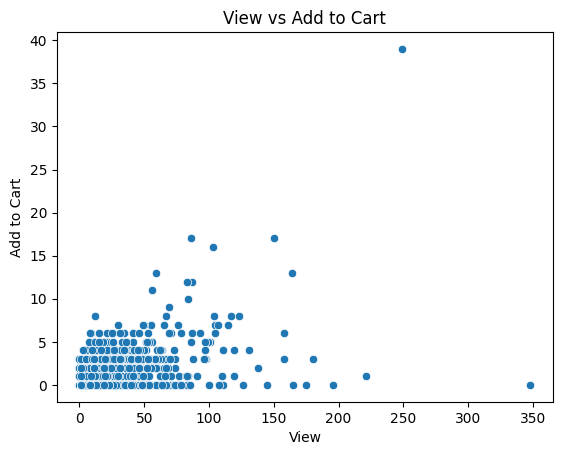

In [110]:
sns.scatterplot(data=aggregated_data, x='view', y='addtocart')
plt.title("View vs Add to Cart")
plt.xlabel("View")
plt.ylabel("Add to Cart")
plt.show()

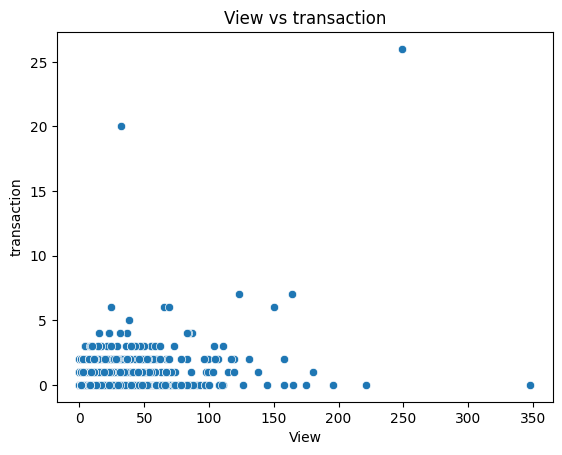

In [111]:
# Pour analyser la relation entre view et transaction.
sns.scatterplot(data=aggregated_data, x='view', y='transaction')
plt.title("View vs transaction")
plt.xlabel("View")
plt.ylabel("transaction")
plt.show()

In [112]:
# Etape 3. Heatmap pour Corrélation entre Variables
# Nous cherchons à visualiser les corrélations entre différentes variables telles que addtocart, transaction, view
# et visitorid.
# Cela peut aider à identifier des relations intéressantes entre les actions des utilisateurs.

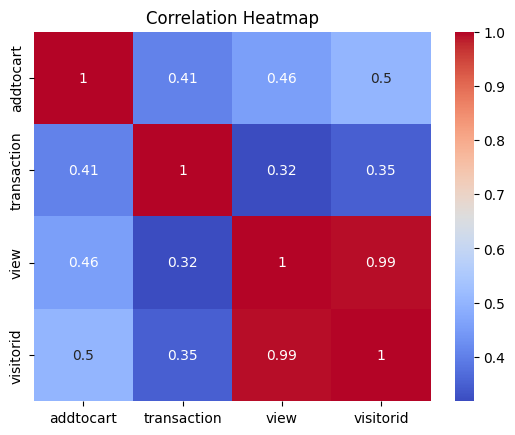

In [113]:
# Calcul de la matrice de corrélation
corr = aggregated_data[['addtocart', 'transaction', 'view', 'visitorid']].corr()

# Heatmap avec Seaborn
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [114]:
# Nous identifions une relation intéressante entre view et visitorid

In [115]:
# Etape 4. Pair Plot
# Nous cherchons à visualiser les relations bivariées entre plusieurs paires de variables

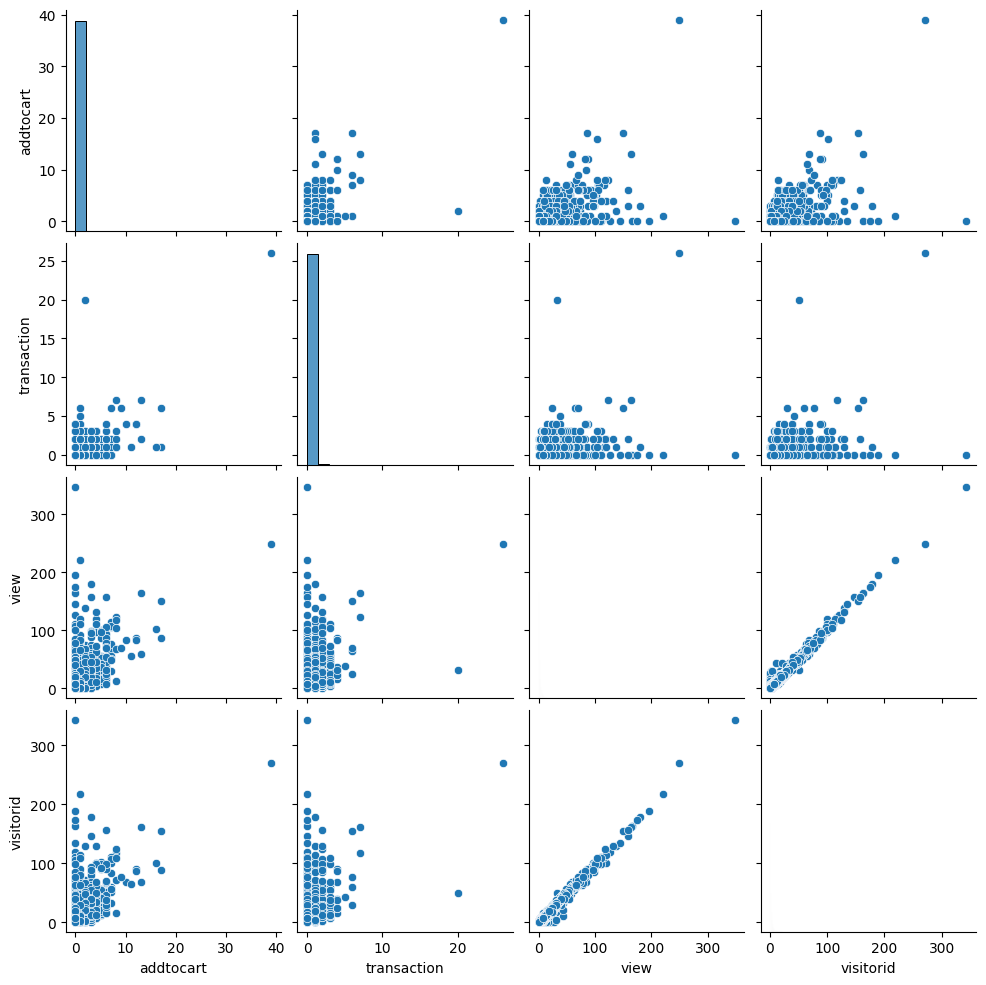

In [116]:
# Pair Plot avec Seaborn
sns.pairplot(aggregated_data[['addtocart', 'transaction', 'view', 'visitorid']])
plt.show()

In [117]:
# Etape 5. Bubble Chart
# Nous cherchons à visualiser visualiser trois dimensions de données :
# view et addtocart sur les axes X et Y et la taille du bubble pour représenter visitorid.

In [118]:
# Bubble chart avec Plotly
fig = px.scatter(aggregated_data, x="view", y="addtocart", size="visitorid", color="category_id", title="Bubble Chart: Views vs AddToCart with Visitor Size")
fig.show()

<ipython-input-119-1cf4e3161914>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




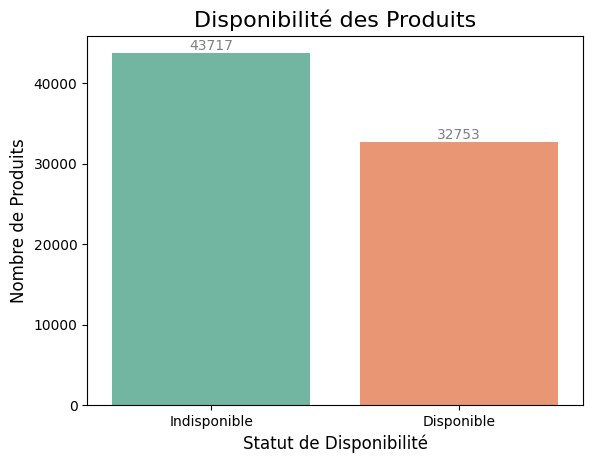

In [119]:
# Etape 6. Etat des stocks, quelle est la proportion de produits disponible/non disponible? =>sns.countplot available
# sur la période considérée, nous avons un peu plus de produits indisponibles en comparaison aux produits disponibles,
# Une influence la non réalisation des transactions?


# Création du graphique
sns.countplot(x='available', data=aggregated_data, palette='Set2')

# Ajout du titre et des étiquettes d'axe
plt.title("Disponibilité des Produits", fontsize=16)
plt.xlabel("Statut de Disponibilité", fontsize=12)
plt.ylabel("Nombre de Produits", fontsize=12)

# Améliorer la légende
# S'available' est un indicateur binaire (comme 0 et 1):
plt.xticks([0, 1], ['Indisponible', 'Disponible'])

# Afficher les valeurs au-dessus des barres
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5), textcoords='offset points')

# Afficher le graphique
plt.show()


In [120]:
# Etape 7 Répartitions des interactions par mois

import plotly.graph_objects as go

values = aggregated_data.mois.value_counts()

# Création du Pie Chart
fig = go.Figure(go.Pie(
    values=values.values,
    labels=values.index,
    pull=[0.1 if i == values.values.argmax() else 0 for i in range(len(values))],  # Mettre en évidence la part la plus grande
    hoverinfo='label+percent',  # Afficher le pourcentage et le label au survol
    textinfo='value'  # Afficher la valeur sur les parts
))

# Personnalisation du layout
fig.update_layout(
    title_text='Répartition des Interactions par Mois',  # Titre du graphique
    title_x=0.5,  # Centrer le titre
    legend_title='Mois',  # Titre pour la légende
    legend=dict(
        traceorder='normal',
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        )
    )
)

fig.show()

# la période de mai à juin semble être la période qui a le plus d'evènements

In [121]:
#Etape 8 : Vente par catégorie

fig = px.box(aggregated_data, x='category_id', y='addtocart', color='category_id', title="Addtocart by Category")
fig.update_layout(
    xaxis_title="ID de la Catégorie",
    yaxis_title="Nombre d'ajouts au panier",
    legend_title="ID de la Catégorie",
    font=dict(family="Arial, sans-serif", size=12, color="RebeccaPurple"),
    title_font_size=20,
    legend=dict(yanchor="middle", y=0.5, xanchor="right", x=1.05),
    template='plotly_dark',
    bargap=0.2,
    xaxis_tickangle=-45,
    xaxis=dict(tickfont=dict(size=10)),
    xaxis_rangeslider_visible=True
)
fig.update_traces(boxpoints='outliers')
fig.show()


In [122]:
#créer une nouvelle colonne target dans votre DataFrame aggregated_data, qui indiquera 0 s'il n'y a pas de
#transactions et 1 s'il y a au moins une transaction pour chaque enregistrement
#Nous allons utiliser une approche conditionnelle :

In [123]:
aggregated_data['target'] = (aggregated_data['transaction'] > 0).astype(int)

In [124]:
#Exploration initiale et Analyse descriptive de aggregated_data

display(aggregated_data.head(10))
display(aggregated_data.tail(10))
display(aggregated_data.info())
aggregated_data.describe()

,itemid,addtocart,transaction,view,available,category_id,parentid,mois,visitorid,target
0,6,0,0,3,0,1091.0,573.0,1,3,0
1,16,0,0,4,1,333.0,1497.0,1,4,0
2,19,0,0,1,1,1171.0,938.0,1,1,0
3,25,0,0,3,1,1509.0,620.0,2,3,0
4,32,0,0,6,0,1173.0,805.0,1,6,0
5,33,0,0,1,0,1526.0,1621.0,1,1,0
6,41,0,0,1,0,1007.0,485.0,1,1,0
7,42,0,0,4,1,84.0,1308.0,1,4,0
10,55,0,0,1,0,586.0,1519.0,1,1,0
11,59,0,0,2,0,237.0,1550.0,1,2,0


,itemid,addtocart,transaction,view,available,category_id,parentid,mois,visitorid,target
90410,466828,0,0,1,1,1078.0,1249.0,1,1,0
90411,466830,0,0,5,1,464.0,143.0,1,4,0
90413,466839,0,0,1,1,531.0,1058.0,1,1,0
90414,466843,0,0,1,1,48.0,500.0,1,1,0
90415,466844,0,0,1,0,1298.0,335.0,1,1,0
90416,466847,0,0,3,1,1221.0,1426.0,1,3,0
90417,466848,0,0,1,1,1250.0,1423.0,1,1,0
90420,466861,0,0,7,1,1051.0,955.0,1,7,0
90421,466862,0,0,1,0,1376.0,480.0,1,1,0
90422,466864,0,0,8,1,373.0,340.0,1,7,0


<class 'pandas.core.frame.DataFrame'>
Index: 76470 entries, 0 to 90422
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   itemid       76470 non-null  int64  
 1   addtocart    76470 non-null  int64  
 2   transaction  76470 non-null  int64  
 3   view         76470 non-null  int64  
 4   available    76470 non-null  object 
 5   category_id  76470 non-null  float64
 6   parentid     76470 non-null  float64
 7   mois         76470 non-null  int64  
 8   visitorid    76470 non-null  int64  
 9   target       76470 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 6.4+ MB


None

,itemid,addtocart,transaction,view,category_id,parentid,mois,visitorid,target
count,76470.000000,76470.000000,76470.000000,76470.000000,76470.000000,76470.000000,76470.000000,76470.000000,76470.000000
mean,233215.822937,0.088178,0.028822,3.148673,885.904695,859.179796,1.056532,3.107245,0.024702
std,134484.288592,0.429989,0.227693,5.846655,482.777599,502.024809,0.360875,5.723524,0.155218
min,6.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000
25%,116699.250000,0.000000,0.000000,1.000000,461.000000,441.000000,1.000000,1.000000,0.000000
50%,232932.500000,0.000000,0.000000,1.000000,959.000000,871.000000,1.000000,1.000000,0.000000
75%,349446.000000,0.000000,0.000000,3.000000,1279.000000,1329.000000,1.000000,3.000000,0.000000
max,466864.000000,39.000000,26.000000,348.000000,1697.000000,1698.000000,5.000000,343.000000,1.000000


In [125]:
#La nouvelle colonne target a été correctement créée dans aggregated_data. Cette colonne contient des valeurs
#binaires (0 ou 1), où :

#0 indique qu'il n'y a pas eu de transactions pour cet itemid
#1 indique qu'il y a eu au moins une transaction pour cet itemid
# La structure du df montre maintenant 10 colonnes, y compris la nouvelle colonne target.
#La colonne target est correctement typée en tant qu'entier (int64),
#et elle a une valeur non nulle pour chaque enregistrement dans le DataFrame,

In [126]:
#Pour utiliser la colonne available dans des modèles de machine learning, nous devons convertir ces catégories
#en valeurs numériques. L'utilisation de l'encodage One-Hot est ce qui est conseillé.

available_dummies = pd.get_dummies(aggregated_data['available'], prefix='available')
aggregated_data = pd.concat([aggregated_data, available_dummies], axis=1)

In [127]:
#Nouvelle exploration initiale et Analyse descriptive de aggregated_data

display(aggregated_data.head(10))
display(aggregated_data.tail(10))
display(aggregated_data.info())
aggregated_data.describe()

,itemid,addtocart,transaction,view,available,category_id,parentid,mois,visitorid,target,available_0,available_1
0,6,0,0,3,0,1091.0,573.0,1,3,0,True,False
1,16,0,0,4,1,333.0,1497.0,1,4,0,False,True
2,19,0,0,1,1,1171.0,938.0,1,1,0,False,True
3,25,0,0,3,1,1509.0,620.0,2,3,0,False,True
4,32,0,0,6,0,1173.0,805.0,1,6,0,True,False
5,33,0,0,1,0,1526.0,1621.0,1,1,0,True,False
6,41,0,0,1,0,1007.0,485.0,1,1,0,True,False
7,42,0,0,4,1,84.0,1308.0,1,4,0,False,True
10,55,0,0,1,0,586.0,1519.0,1,1,0,True,False
11,59,0,0,2,0,237.0,1550.0,1,2,0,True,False


,itemid,addtocart,transaction,view,available,category_id,parentid,mois,visitorid,target,available_0,available_1
90410,466828,0,0,1,1,1078.0,1249.0,1,1,0,False,True
90411,466830,0,0,5,1,464.0,143.0,1,4,0,False,True
90413,466839,0,0,1,1,531.0,1058.0,1,1,0,False,True
90414,466843,0,0,1,1,48.0,500.0,1,1,0,False,True
90415,466844,0,0,1,0,1298.0,335.0,1,1,0,True,False
90416,466847,0,0,3,1,1221.0,1426.0,1,3,0,False,True
90417,466848,0,0,1,1,1250.0,1423.0,1,1,0,False,True
90420,466861,0,0,7,1,1051.0,955.0,1,7,0,False,True
90421,466862,0,0,1,0,1376.0,480.0,1,1,0,True,False
90422,466864,0,0,8,1,373.0,340.0,1,7,0,False,True


<class 'pandas.core.frame.DataFrame'>
Index: 76470 entries, 0 to 90422
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   itemid       76470 non-null  int64  
 1   addtocart    76470 non-null  int64  
 2   transaction  76470 non-null  int64  
 3   view         76470 non-null  int64  
 4   available    76470 non-null  object 
 5   category_id  76470 non-null  float64
 6   parentid     76470 non-null  float64
 7   mois         76470 non-null  int64  
 8   visitorid    76470 non-null  int64  
 9   target       76470 non-null  int64  
 10  available_0  76470 non-null  bool   
 11  available_1  76470 non-null  bool   
dtypes: bool(2), float64(2), int64(7), object(1)
memory usage: 6.6+ MB


None

,itemid,addtocart,transaction,view,category_id,parentid,mois,visitorid,target
count,76470.000000,76470.000000,76470.000000,76470.000000,76470.000000,76470.000000,76470.000000,76470.000000,76470.000000
mean,233215.822937,0.088178,0.028822,3.148673,885.904695,859.179796,1.056532,3.107245,0.024702
std,134484.288592,0.429989,0.227693,5.846655,482.777599,502.024809,0.360875,5.723524,0.155218
min,6.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000
25%,116699.250000,0.000000,0.000000,1.000000,461.000000,441.000000,1.000000,1.000000,0.000000
50%,232932.500000,0.000000,0.000000,1.000000,959.000000,871.000000,1.000000,1.000000,0.000000
75%,349446.000000,0.000000,0.000000,3.000000,1279.000000,1329.000000,1.000000,3.000000,0.000000
max,466864.000000,39.000000,26.000000,348.000000,1697.000000,1698.000000,5.000000,343.000000,1.000000


In [128]:
#Nous pouvons envisager de supprimer la colonne originale available pour éviter la redondance dans les données :
#aggregated_data.drop('available', axis=1, inplace=True)

In [129]:
#Pour créer deux DataFrames distincts à partir de aggregated_data, un pour la régression et un autre
#pour la classification, nous devons d'abord déterminer quels ensembles de caractéristiques (features)
#seront utilisés pour chaque tâche comme le choix de la variable cible (target) .

In [130]:
#DataFrame pour la Régression :

# Nous souhaitons prédire 'view' car il est crucial de choisir une variable cible qui varie de manière continue :
#features_for_regression = ['itemid', 'addtocart', 'transaction', 'available_0', 'available_1', 'category_id', 'parentid', 'mois', 'visitorid']
#df_regression = aggregated_data[features_for_regression]


# Inclure 'view' en tant que colonne cible dans df_regression
features_for_regression = ['itemid', 'addtocart', 'transaction', 'available_0', 'available_1', 'category_id', 'parentid', 'mois', 'visitorid']
target_for_regression = ['view']

# S'assurer d'inclure la variable cible dans le DataFrame
df_regression = aggregated_data[features_for_regression + target_for_regression]


In [131]:
#DataFrame pour la Classification :

# Nous souhaitons prédire si une transaction a eu lieu (la colonne target crée). Nous incluons toutes les
# autres variables caractéristiques sauf celles utilisées spécifiquement pour la régression.


# La variable cible est 'target'
features_for_classification = ['itemid', 'addtocart', 'view', 'available_0', 'available_1', 'category_id', 'parentid', 'mois', 'visitorid', 'target']
df_classification = aggregated_data[features_for_classification]





In [132]:
#Question 1 : Entrainer 2 modéles sur la régression :


In [133]:
#Pour prédire la variable view dans une tâche de régression, nous utilisons la régression linéaire et
#la forêt aléatoire, deux modèles donc :

In [134]:
#1 Préparation des données

from sklearn.model_selection import train_test_split

# Séparer les caractéristiques (X) et la cible (y)
X = df_regression.drop('view', axis=1)
y = df_regression['view']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [135]:
#2. Normalisation des caractéristiques
#La normalisation est particulièrement utile pour la régression linéaire et peut également bénéficier à la forêt aléatoire
#dans certains cas.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [136]:
#3. Construction et Entraînement des Modèles
#Régression Linéaire

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)


#Forêt Aléatoire

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [137]:
#4 Évaluation des Modèles
# Nous utilisons des métriques différentes pour évaluer
# les performances de chaque modèle

#MSE : Le MSE mesure la moyenne des carrés des erreurs, c'est-à-dire la différence entre les valeurs observées
# et celles prédites par le modèle.

# RMSE (Root Mean Squared Error) : Le RMSE est simplement la racine carrée du MSE, ce qui rend l'erreur
#plus interprétable car elle est dans les mêmes unités que la variable cible.

#MAE (Mean Absolute Error) : Le MAE mesure la moyenne des erreurs absolues. Contrairement au MSE, le
# MAE n'élève pas les erreurs au carré, ce qui donne une meilleure idée des erreurs en termes réels.

# R² Score (Coefficient of Determination) : Le R² Score mesure à quel point les variations de la variable cible
# peuvent être expliquées par les caractéristiques du modèle. Un score de 1 indique que le modèle
# explique parfaitement toute la variabilité, tandis qu'un score de 0 indiquerait que le modèle n'explique pas
# du tout la variabilité.


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Prédictions
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

# Évaluation pour la régression linéaire
print("Régression Linéaire:")
print("MSE:", mean_squared_error(y_test, y_pred_linear))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_linear)))
print("MAE:", mean_absolute_error(y_test, y_pred_linear))
print("R2 Score:", r2_score(y_test, y_pred_linear))

# Évaluation pour la forêt aléatoire
print("\nForêt Aléatoire:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Régression Linéaire:
MSE: 0.4253390098467079
RMSE: 0.6521801973739374
MAE: 0.20829981355715382
R2 Score: 0.9894749063121354

Forêt Aléatoire:
MSE: 2.0238674512880874
RMSE: 1.4226269543657915
MAE: 0.24159147378056753
R2 Score: 0.9499190197854087


In [138]:
#5 Interpretations

#Les résultats montrent des performances intéressantes des deux modèles sur la tâche de prédiction du nombre de vues (`view`),
#mais avec des différences notables :

### Régression Linéaire

#MSE et RMSE sont relativement bas, ce qui indique une bonne précision du modèle.
#MAE est également faible, suggérant que les erreurs moyennes de prédiction sont minimes.
#R2 Scoretrès proche de 1 (0.989) montre que le modèle de régression linéaire explique une grande partie de la variance des données,
#ce qui est excellent.

### Forêt Aléatoire

#MSE et RMSE sont plus élevées que celles de la régression linéaire, indiquant que le modèle fait
#en moyenne des erreurs plus importantes sur les prédictions.
#MAE est légèrement plus élevé, suggérant des erreurs absolues moyennes un peu plus importantes par rapport à la régression linéaire.
#R2 Score est plus bas (0.950) que celui de la régression linéaire, mais reste élevé, indiquant que le modèle capture bien
#la variance des données, bien que moins efficacement que la régression linéaire dans ce cas.

### Interprétation

#Les résultats suggèrent que la régression linéaire performe mieux que la forêt aléatoire pour prédire le nombre de vues.
#Cela pourrait être dû à la nature des données qui se prêtent bien à un modèle linéaire, peut-être parce que les relations
#entre les caractéristiques et la cible sont plus linéaires que non linéaires.

#La forêt aléatoire, bien qu'étant un modèle puissant ne surpasse pas la régression linéaire dans ce cas.
#Cela signifie que pour cette tâche spécifique et cet ensemble de données, la simplicité de la régression linéaire est avantageuse.



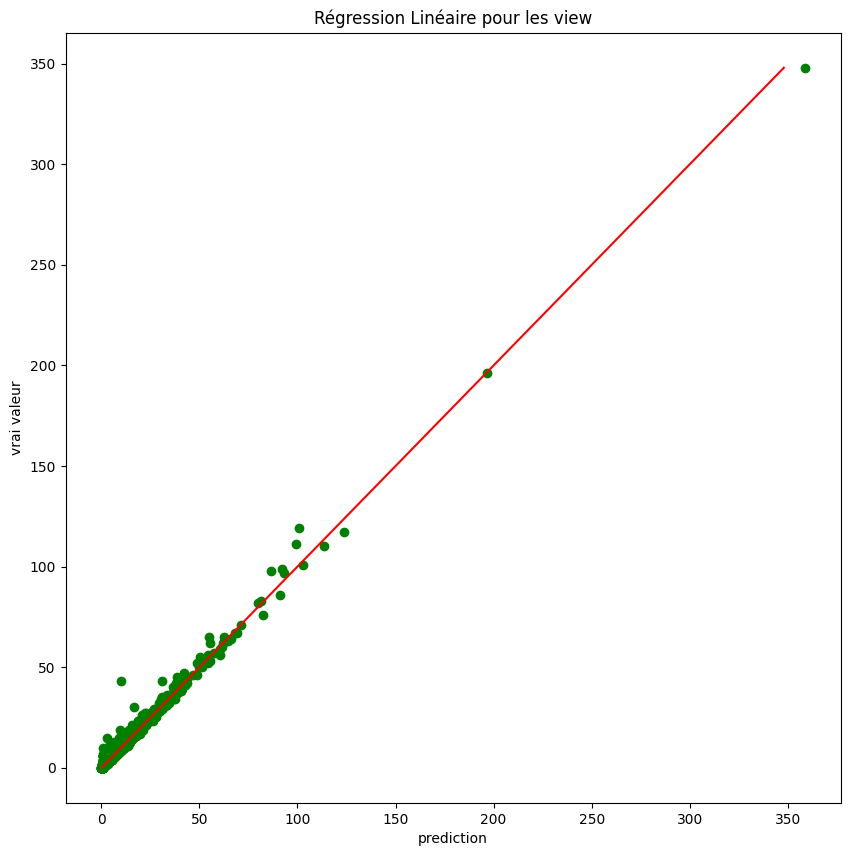

In [139]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
plt.scatter(y_pred_linear, y_test, c='green')
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color = 'red')
plt.xlabel("prediction")
plt.ylabel("vrai valeur")
plt.title('Régression Linéaire pour les view')
plt.show()

In [140]:
#Question 2 : Entrainer 3 modèles de classification

In [141]:
# Pour prédire si une transaction a eu lieu en utilisant la colonne target, nous allons créer, entraîner et évaluer
# trois modèles de classification différents, tout en gérant correctement les valeurs manquantes et en appliquant
# les transformations nécessaires.

# Nous utiliserons la régression logistique, l'arbre de décision et le classifieur k-plus proches voisins (k-NN).
# Les étapes sont similaires à celles pour la régression, mais avec des modèles de classification.

In [142]:
#1 Préparation des données

from sklearn.model_selection import train_test_split

# Séparation des caractéristiques et de la cible
X = df_classification.drop('target', axis=1)
y = df_classification['target']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [143]:
#2: Normalisation/Standardisation

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [144]:
#3:  Modèles de Classification

# a. Régression logistique

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Évaluation
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Régression Logistique:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))


# b. Arbre de décision

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

# Évaluation
y_pred_dt = dt.predict(X_test_scaled)
print("Arbre de Décision:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


# c. k-Plus Proches Voisins (k-NN)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Évaluation
y_pred_knn = knn.predict(X_test_scaled)
print("k-NN:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))



Régression Logistique:
Accuracy: 0.9744344187262979
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14899
           1       0.53      0.10      0.17       395

    accuracy                           0.97     15294
   macro avg       0.75      0.55      0.58     15294
weighted avg       0.97      0.97      0.97     15294

Arbre de Décision:
Accuracy: 0.9750228847914215
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14899
           1       0.52      0.51      0.52       395

    accuracy                           0.98     15294
   macro avg       0.75      0.75      0.75     15294
weighted avg       0.97      0.98      0.97     15294

k-NN:
Accuracy: 0.9732574865960507
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14899
           1       0.39      0.06      0.11       395

    accuracy                           0.97    

In [145]:
#4: Évaluation des modèles
#Les résultats montrent que les trois modèles de classification - régression logistique, arbre de décision et k-NN
#ont atteint des niveaux élevés d'accuracy globale sur l'ensemble de test.
#Cependant, il est important de noter les différences significatives dans la performance des modèles lorsqu'il s'agit de
#prédire les transactions positives (classe `1`).

### Analyse des Résultats

#Régression Logistique et k-NN montrent une faible performance sur la classe minoritaire (`1`), avec une précision et
#un recall particulièrement bas pour k-NN. Cela suggère que, malgré une accuracy globale élevée,
#ces modèles peinent à identifier correctement les cas où une transaction a effectivement eu lieu.

#L'Arbre de Décision présente un meilleur équilibre entre la précision et le recall pour la classe `1`,
#avec une f1-score significativement plus élevée que celle obtenue par la régression logistique et le k-NN.

#Cela indique une meilleure capacité à identifier les transactions tout en maintenant un taux de faux positifs relativement bas.

### Implications

#Déséquilibre des Classes : La distribution déséquilibrée des classes, avec beaucoup plus d'exemples négatifs (`0`) que positifs (`1`),
#semble affecter la performance de tous les modèles, particulièrement en ce qui concerne la précision et le recall pour la
#classe minoritaire.
#Choix du Modèle : Bien que l'arbre de décision ait montré une meilleure capacité à gérer la classe minoritaire,
#il est important de noter que la précision et le recall restent perfectibles.
#Cela peut indiquer la nécessité d'explorer des approches supplémentaires pour gérer le déséquilibre des classes,
#comme le rééchantillonnage des données ou l'utilisation de techniques de pondération des classes.

### Recommandations

#Rééquilibrage des Classes : Considérer l'utilisation de techniques comme SMOTE (Synthetic Minority Over-sampling Technique)
#pour augmenter le nombre d'exemples de la classe minoritaire dans l'ensemble d'entraînement,
#ou ajuster les poids des classes dans les modèles.
#Optimisation des Hyperparamètres : Pour chaque modèle, explorer une gamme plus large d'hyperparamètres pourrait aider
#à améliorer la performance sur la classe minoritaire.
#Évaluation avec AUC-ROC : En plus des métriques actuelles, considérer l'utilisation de l'AUC-ROC comme métrique d'évaluation
#pour mieux comprendre la performance des modèles sur les deux classes.



In [146]:
# Les résultats obtenus sont exceptionnels, avec une précision, un rappel et un score F1 de 1.0 pour tous les
# modèles de classification, et des matrices de confusion indiquant qu'il n'y a pas eu d'erreurs de classification.
# Cependant, ces résultats parfaits soulevent certaines préoccupations et interrogations


In [147]:
#la variable cible target est très déséquilibrée ainsi les modèles prédisent la classe majoritaire.

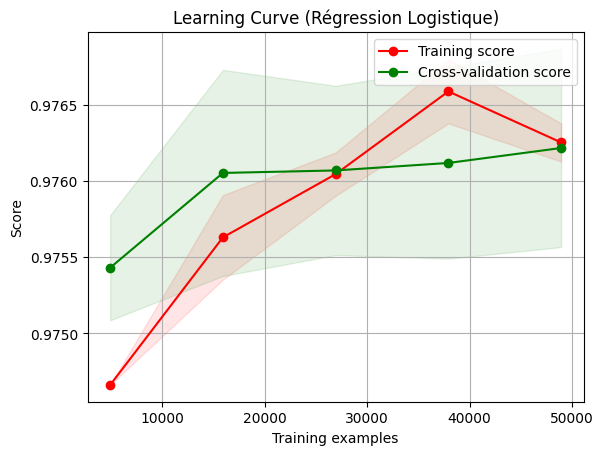

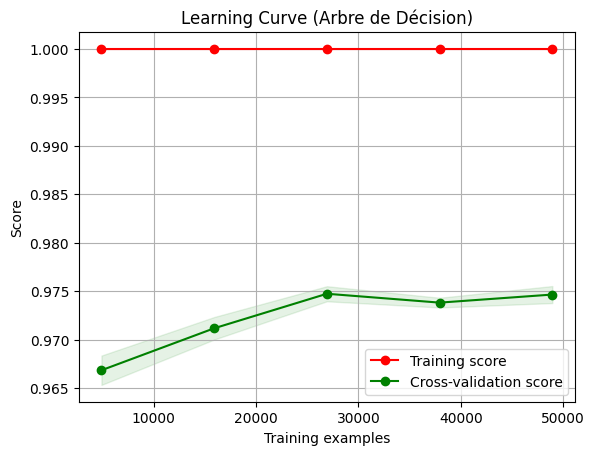

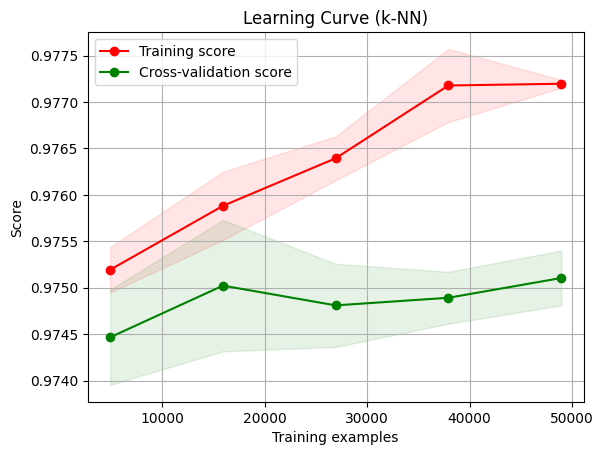

In [148]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Fonction pour créer des courbes d'apprentissage
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Création des courbes d'apprentissage pour chaque modèle
models = [("Régression Logistique", log_reg), ("Arbre de Décision", dt), ("k-NN", knn)]
for name, model in models:
    plot_learning_curve(model, f"Learning Curve ({name})", X_train_scaled, y_train, cv=5)
    plt.show()

In [149]:
#Notre jeux de donnée est très déséquilibré avec un classe majoritaire ( 0) très dominante et une deuxième classe très minoritaire
#donc nous allons utiliser l'Isolation Forest et le One Class SVM
#Ces modèles sont conçus pour identifier les observations qui s'écartent de la norme, ce qui peut correspondre à notre
#classe minoritaire dans un contexte déséquilibré

#Nous allons d'abord entraîner les modèles sur une partie des données (ensemble d'entraînement) puis évaluer leur performance sur une
#autre partie (ensemble de test), et enfin évaluer leur performance sur l'intégralité des données pour comparer.

In [150]:
# Séparation en Ensembles d'Entraînement et de Test

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Préparation des données
X = df_classification.drop('target', axis=1)
y = df_classification['target']

# Séparation en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [151]:
# Isolation Forest
#Entraînement et Évaluation sur l'Ensemble de Test

from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, accuracy_score

# Entraînement d'Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
iso_forest.fit(X_train_scaled)

# Prédiction sur l'ensemble de test
y_pred_test_iso = iso_forest.predict(X_test_scaled)
y_pred_test_iso = np.where(y_pred_test_iso == 1, 0, 1)  # Conversion

# Évaluation sur l'ensemble de test
print("Isolation Forest Performance sur le Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred_test_iso))
print(classification_report(y_test, y_pred_test_iso))




Isolation Forest Performance sur le Test Set:
Accuracy: 0.82071400549235
              precision    recall  f1-score   support

           0       0.99      0.83      0.90     14899
           1       0.09      0.64      0.16       395

    accuracy                           0.82     15294
   macro avg       0.54      0.73      0.53     15294
weighted avg       0.97      0.82      0.88     15294



In [152]:
#Évaluation sur l'Intégralité des Données

X_scaled_full = scaler.transform(X)
y_pred_full_iso = iso_forest.predict(X_scaled_full)
# Convertir les prédictions pour correspondre aux étiquettes cibles (1 pour anomalies, 0 pour normal)
y_pred_full_iso = np.where(y_pred_full_iso == 1, 0, 1)

print("Isolation Forest Performance sur l'Intégralité des Données:")
print("Accuracy:", accuracy_score(y, y_pred_full_iso))
print(classification_report(y, y_pred_full_iso))



Isolation Forest Performance sur l'Intégralité des Données:
Accuracy: 0.8189616843206486
              precision    recall  f1-score   support

           0       0.99      0.82      0.90     74581
           1       0.08      0.64      0.15      1889

    accuracy                           0.82     76470
   macro avg       0.54      0.73      0.52     76470
weighted avg       0.97      0.82      0.88     76470



In [153]:
#One-Class SVM
#Entraînement et Évaluation sur l'Ensemble de Test

from sklearn.svm import OneClassSVM

# Entraînement de One-Class SVM
oc_svm = OneClassSVM(kernel='rbf', gamma='auto')
oc_svm.fit(X_train_scaled[y_train == 0])  # Entraîner uniquement sur la classe majoritaire

# Prédiction sur l'ensemble de test
y_pred_test_svm = oc_svm.predict(X_test_scaled)
y_pred_test_svm = np.where(y_pred_test_svm == 1, 0, 1)  # Conversion

# Évaluation sur l'ensemble de test
print("One-Class SVM Performance sur le Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred_test_svm))
print(classification_report(y_test, y_pred_test_svm))



One-Class SVM Performance sur le Test Set:
Accuracy: 0.5120308617758598
              precision    recall  f1-score   support

           0       0.99      0.50      0.67     14899
           1       0.04      0.78      0.08       395

    accuracy                           0.51     15294
   macro avg       0.51      0.64      0.37     15294
weighted avg       0.96      0.51      0.65     15294



In [154]:
#Évaluation sur l'Intégralité des Donnée
y_pred_full_svm = oc_svm.predict(X_scaled_full)
y_pred_full_svm = np.where(y_pred_full_svm == 1, 0, 1)  # Conversion

print("One-Class SVM Performance sur l'Intégralité des Données:")
print("Accuracy:", accuracy_score(y, y_pred_full_svm))
print(classification_report(y, y_pred_full_svm))




One-Class SVM Performance sur l'Intégralité des Données:
Accuracy: 0.5078331371779783
              precision    recall  f1-score   support

           0       0.99      0.50      0.67     74581
           1       0.04      0.78      0.07      1889

    accuracy                           0.51     76470
   macro avg       0.51      0.64      0.37     76470
weighted avg       0.97      0.51      0.65     76470



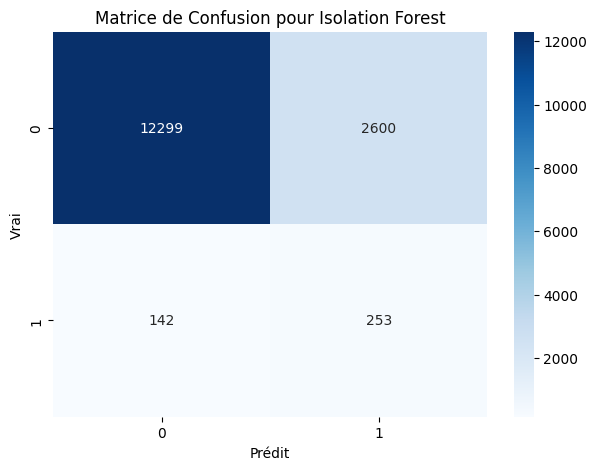

In [155]:
#Matrice de Confusion
#La matrice de confusion pour chaque modèle sur l'ensemble de test peut nous fournir des insights visuels sur leur performance,
#en particulier la répartition des vrais positifs, faux positifs, vrais négatifs, et faux négatifs.

# Isolation Forest

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcul de la matrice de confusion pour Isolation Forest
cm_iso = confusion_matrix(y_test, y_pred_test_iso)

# Tracé de la matrice de confusion
plt.figure(figsize=(7, 5))
sns.heatmap(cm_iso, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Matrice de Confusion pour Isolation Forest')
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.show()


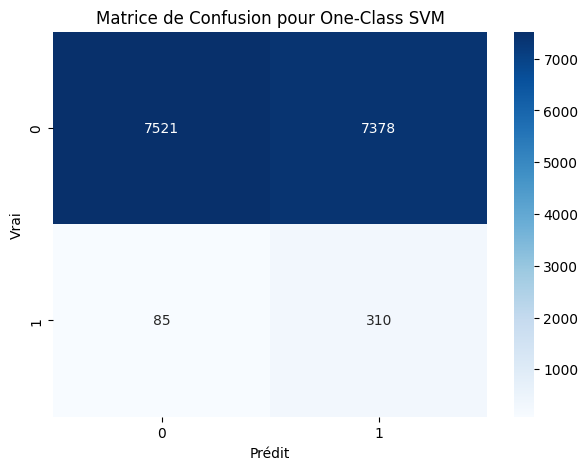

In [156]:
#One-Class SVM

# Calcul de la matrice de confusion pour One-Class SVM
cm_iso = confusion_matrix(y_test, y_pred_test_svm)

# Tracé de la matrice de confusion
plt.figure(figsize=(7, 5))
sns.heatmap(cm_iso, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Matrice de Confusion pour One-Class SVM')
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.show()

In [157]:
#Calcul des moyennes géométriques pour les 2 derniers modèles :

In [158]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [159]:
from imblearn.metrics import geometric_mean_score

# Pour Isolation Forest
gmean_iso = geometric_mean_score(y_test, y_pred_test_iso)

# Pour One-Class SVM
gmean_svm = geometric_mean_score(y_test, y_pred_test_svm)

print(f"Moyenne Géométrique pour Isolation Forest: {gmean_iso}")
print(f"Moyenne Géométrique pour One-Class SVM: {gmean_svm}")

Moyenne Géométrique pour Isolation Forest: 0.7271400294596565
Moyenne Géométrique pour One-Class SVM: 0.6294214416695109


In [160]:
#Isolation Forest: 0.727
#Avec une moyenne géométrique d'environ 0.727, Isolation Forest montre une capacité raisonnable à identifier
#correctement les deux classes, mais cette valeur suggère aussi qu'il y a de la place pour l'amélioration.
#Un score parfait serait de 1, ce qui indiquerait que le modèle a un taux de vrais positifs de 100%
#pour toutes les classes.
#En pratique, une valeur supérieure à 0.7 est souvent considérée comme bonne dans des contextes
#où les classes sont déséquilibrées.
#Cela indique que le modèle a un équilibre assez bon entre la sensibilité (capacité à détecter les anomalies)
#et la spécificité (capacité à identifier les observations normales).

In [161]:
#One-Class SVM: 0.629
#Pour le One-Class SVM, la moyenne géométrique est d'environ 0.629. C'est inférieur à celle d'Isolation Forest,
#indiquant que le One-Class SVM a une performance globale plus faible sur votre jeu de données.
#Cela peut être dû au fait que ce modèle a du mal à équilibrer la détection des anomalies et des observations
#normales, se traduisant par un taux de vrais positifs inférieur pour une ou les deux classes.

In [162]:
#Les résultats indiquent que, bien que le modèle Isolation Forest soit relativement compétent pour gérer un jeu
#de données déséquilibré, il reste une marge d'amélioration pour augmenter la moyenne géométrique et donc la
#performance équilibrée sur les deux classes

In [163]:
# Nous allons utiliser 3 autres méthodes, des méthodes de clustering pour essayer de trouver de meilleurs résultats

#DBScan, KMeans,CaH sont les modèles choisis

In [164]:
#DBScan :
#L'algorithme DBSCAN utilise 2 paramètres : la distance e et le nombre minimum de points {MinPts} devant
#se trouver dans un rayon {epsilon } pour que ces points soient considérés comme un cluster.
#Les paramètres d'entrées sont donc une estimation de la densité de points des clusters.
#L'idée de base de l'algorithme est ensuite, pour un point donné, de récupérer son {epsilon }-voisinage et
#de vérifier qu'il contient bien {MinPts} points ou plus. Ce point est alors considéré comme faisant partie
#d'un cluster. On parcourt ensuite l'{epsilon }-voisinage de proche en proche afin de trouver l'ensemble des
#points du cluster.

In [165]:
#DBSCAN (Density-Based Spatial Clustering of Applications with Noise) est un algorithme de clustering qui peut
#également être utilisé pour la détection d'anomalies. Il considère les points isolés dans des régions de
#faible densité comme des anomalies.

In [166]:
#1. Préparation des Données

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Préparation des données
X = df_classification.drop('target', axis=1)
y = df_classification['target']

# Normalisation des caractéristiques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=10)
clusters = dbscan.fit_predict(X_scaled)

# Marquer les anomalies détectées par DBSCAN
anomalies = clusters == -1

In [167]:
#2. Évaluation des Performances sur les Événements 'Target'

from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score

# Évaluation avec les vraies étiquettes "Target"
y_pred_dbscan = anomalies.astype(int)  # Convertir en 0 pour les points normaux et 1 pour les anomalies

print("DBSCAN Performance Evaluation:")
print("Accuracy:", accuracy_score(df_classification['target'], y_pred_dbscan))
print("F1 Score:", f1_score(df_classification['target'], y_pred_dbscan))
print("Recall:", recall_score(df_classification['target'], y_pred_dbscan))
print("Precision:", precision_score(df_classification['target'], y_pred_dbscan))
print("Classification Report:\n", classification_report(df_classification['target'], y_pred_dbscan))

DBSCAN Performance Evaluation:
Accuracy: 0.879756767359749
F1 Score: 0.18549030029231997
Recall: 0.5542615140285866
Precision: 0.11138297872340426
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94     74581
           1       0.11      0.55      0.19      1889

    accuracy                           0.88     76470
   macro avg       0.55      0.72      0.56     76470
weighted avg       0.97      0.88      0.92     76470



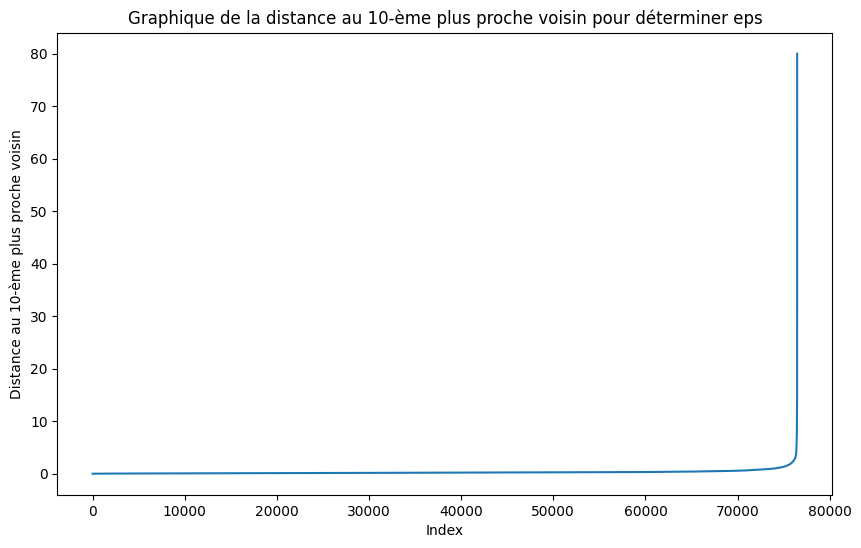

In [168]:
# Afin d'affiner la valeur de eps
# Nous utiliserons la même matrice de caractéristiques X_scaled que celle utilisée pour DBSCAN

from sklearn.neighbors import NearestNeighbors

# Trouver la distance du k-ième voisin le plus proche
k = 10
nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Trier et tracer les distances par point
sorted_distances = np.sort(distances, axis=0)
sorted_distances = sorted_distances[:, k-1]
plt.figure(figsize=(10,6))
plt.plot(sorted_distances)
plt.xlabel('Index')
plt.ylabel(f'Distance au {k}-ème plus proche voisin')
plt.title(f'Graphique de la distance au {k}-ème plus proche voisin pour déterminer eps')
plt.show()

In [169]:
#DBSCAN Performance Evaluation (DBSCAN(eps=0.35, min_samples=10)):
#Accuracy: 0.8546096508434681
#F1 Score: 0.17276785714285714
#Recall: 0.6146109052408681
#Precision: 0.10051077828759415
#Classification Report:
               #precision    recall  f1-score   support

           #0       0.99      0.86      0.92     74581
           #1       0.10      0.61      0.17      1889

    #accuracy                           0.85     76470
   #macro avg       0.54      0.74      0.55     76470
#weighted avg       0.97      0.85      0.90     76470


#######################

#DBSCAN Performance Evaluation (DBSCAN(eps=0.3, min_samples=10)):
#Accuracy: 0.8217993984569112
#F1 Score: 0.15763120479693393
#Recall: 0.6749602964531498
#Precision: 0.0892357222844345
#Classification Report:
               #precision    recall  f1-score   support

           #0       0.99      0.83      0.90     74581
           #1       0.09      0.67      0.16      1889

    #accuracy                           0.82     76470
   #macro avg       0.54      0.75      0.53     76470
#weighted avg       0.97      0.82      0.88     76470



#3. Interprétation Sur la dernière évaluation / notation uniquement !
#Fiable pour Prédire "Target" ?
#Précision : La précision pour la classe minoritaire (anomalies ou "Target"=1) est très faible (environ 8.9%),
#ce qui signifie que sur l'ensemble des instances préditées comme des anomalies, seulement
#une petite fraction sont réellement des anomalies. Cela indique un grand nombre de faux positifs.

#Rappel (Recall) : Le rappel pour la classe minoritaire est assez élevé (environ 67.5%), ce qui signifie que
#le modèle est capable de détecter une grande partie des anomalies réelles. Cependant, ce taux élevé est
#atteint au détriment de nombreux faux positifs.

#Score F1 : Le score F1 pour la classe minoritaire est également très faible (environ 15.8%), indiquant que
#l'équilibre entre la précision et le rappel n'est pas optimal. Le score F1 est particulièrement important pour
#évaluer la performance sur des jeux de données déséquilibrés car il tient compte à la fois de la précision et
#du rappel.

#Rapport de Classification : Le rapport montre que le modèle a une performance exceptionnelle pour la classe
#majoritaire (normale) avec un score F1 de 90%. Cependant, la classe d'intérêt ici est la classe minoritaire
#(anomalies ou ventes), et le score F1 de seulement 16% pour cette classe est un indicateur de performance
#insuffisante.

#En conclusion, DBSCAN, dans sa forme actuelle, ne semble pas être un modèle fiable pour prédire avec précision
#les événements "Target" dans notre contexte.

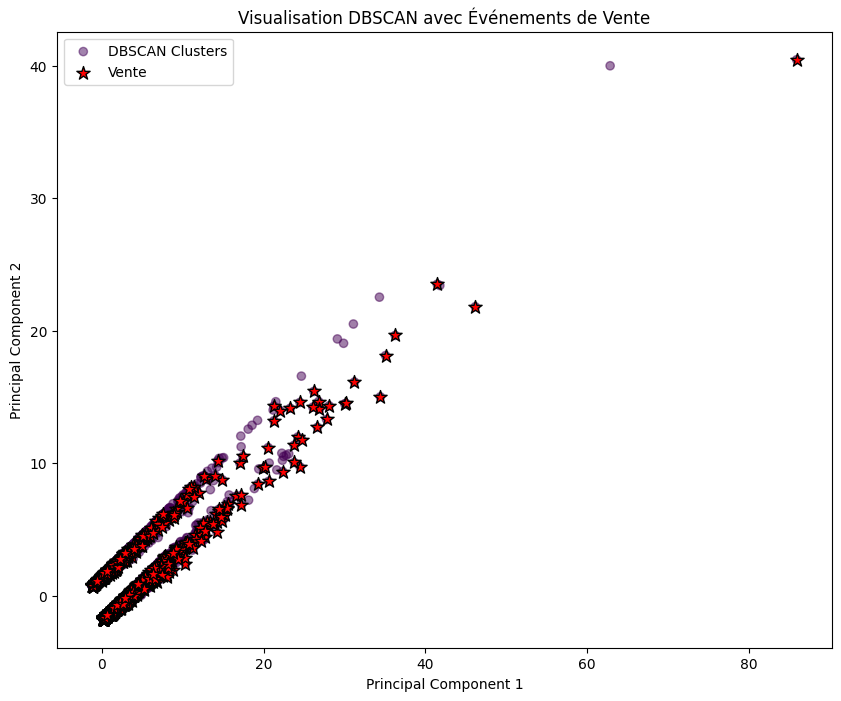

In [170]:
#4. Visualisation des Résultats

from sklearn.decomposition import PCA

# Réduire les dimensions pour la visualisation avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Création du graphique
plt.figure(figsize=(10, 8))

# Visualisation des clusters DBSCAN
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5, label='DBSCAN Clusters')

# Ajout des points indiquant les événements de vente

sales = df_classification['target'] == 1
plt.scatter(X_pca[sales, 0], X_pca[sales, 1], c='red', edgecolor='k', s=100, label='Vente', marker='*')

# Légende et titres
plt.legend()
plt.title('Visualisation DBSCAN avec Événements de Vente')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Affichage du graphique
plt.show()


In [171]:
#KMeans:
  #Nous allons tester KMeans dans un contexte de détection d'anomalies en vue de trouver une méthode satisfaisante,
  #on peut utiliser une approche où les instances les plus éloignées des centres de cluster sont considérées
  #comme des anomalies.

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Préparation des données
X = df_classification.drop('target', axis=1)

# Normalisation des caractéristiques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

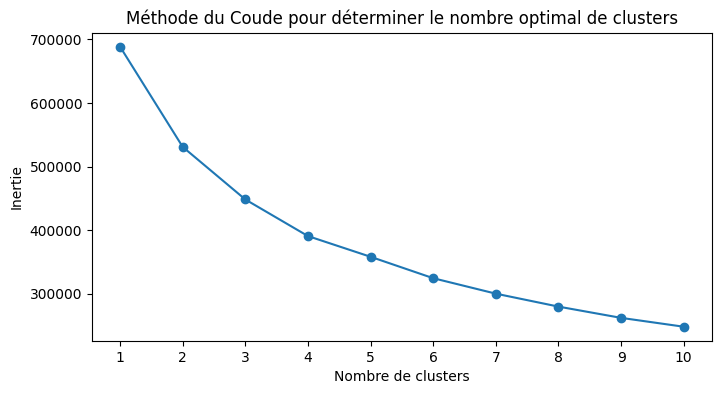

In [172]:
#2. Application de la Méthode du Coude

# Calcul de la somme des carrés des distances pour différents nombres de clusters
inertia = []
for n_clusters in range(1, 11):  # Test de 1 à 10 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Tracé de la courbe
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Méthode du Coude pour déterminer le nombre optimal de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.xticks(range(1, 11))
plt.show()

In [173]:
#3. Application de KMeans avec le Nombre Optimal de Clusters


k_optimal = 4  # le nombre optimal identifié
kmeans_optimal = KMeans(n_clusters=k_optimal, random_state=42)
kmeans_optimal.fit(X_scaled)

# Assignation des clusters
clusters = kmeans_optimal.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



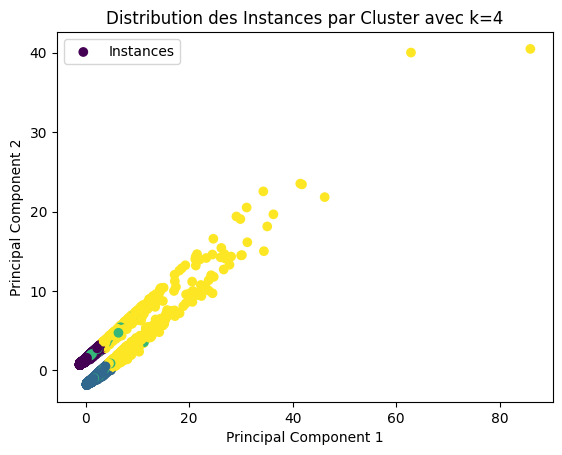

In [174]:
#4. Analyse et Visualisation des Clusters Optimaux

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', label='Instances')
plt.title(f'Distribution des Instances par Cluster avec k={k_optimal}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [175]:
#Pour évaluer KMeans en tant que détecteur d'anomalies en comparant les résultats aux étiquettes réelles,
#Nous allons d'abord décider comment définir une "anomalie" en fonction des clusters trouvés par KMeans.
#Une approche courante consiste à considérer les points qui sont les plus éloignés du centre de leur cluster
#comme des anomalies.




#Étape 1: Calculer la Distance de Chaque Point à Son Centre de Cluster

# Calculer les distances de chaque point à son centre de cluster
distances = kmeans_optimal.transform(X_scaled)  # kmeans_optimal est votre modèle KMeans entraîné

# Sélectionner la distance au centre de cluster le plus proche pour chaque point
min_distances = np.min(distances, axis=1)

#Étape 2: Déterminer un Seuil pour les Anomalies

# Identifier un seuil de distance. Par exemple, choisir le 95e percentile comme seuil pour les anomalies
threshold = np.percentile(min_distances, 95)

#Étape 3: Identifier les Anomalies

# Les points avec une distance supérieure au seuil sont marqués comme des anomalies
anomalies = min_distances > threshold

# Convertir le résultat en étiquettes binaires: 1 pour les anomalies, 0 pour les points normaux
y_pred = anomalies.astype(int)


#4.  Comparer les Prédictions aux Étiquettes Réelles
#Pour évaluer KMeans en tant que détecteur d'anomalies, comparons les anomalies identifiées avec
#les étiquettes réelles.


from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Évaluation
accuracy = accuracy_score(df_classification['target'], y_pred)
conf_matrix = confusion_matrix(df_classification['target'], y_pred)
report = classification_report(df_classification['target'], y_pred)

print("Accuracy:", accuracy)
print("Matrice de confusion:\n", conf_matrix)
print("Rapport de classification:\n", report)

Accuracy: 0.9406172355171963
Matrice de confusion:
 [[71343  3238]
 [ 1303   586]]
Rapport de classification:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     74581
           1       0.15      0.31      0.21      1889

    accuracy                           0.94     76470
   macro avg       0.57      0.63      0.59     76470
weighted avg       0.96      0.94      0.95     76470



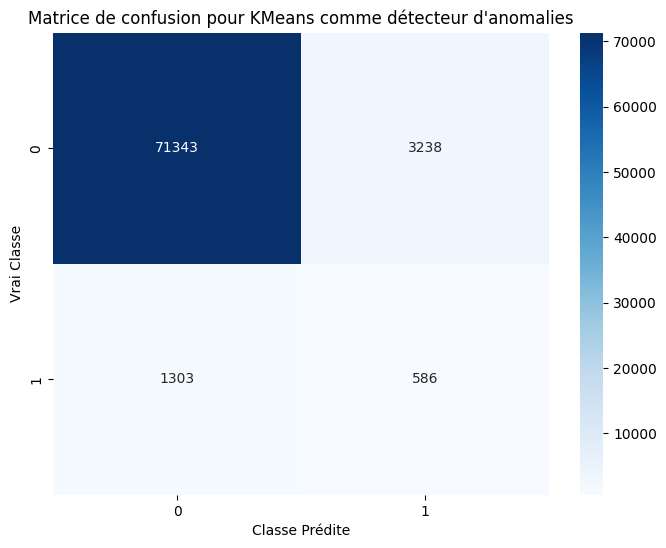

In [176]:
#Visualisation de la Matrice de Confusion

import seaborn as sns

# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion pour KMeans comme détecteur d\'anomalies')
plt.ylabel('Vrai Classe')
plt.xlabel('Classe Prédite')
plt.show()


In [177]:
# Les résultats de l'utilisation de KMeans comme détecteur d'anomalies montrent ce qui suit :

### Classe Majoritaire (Classe 0 - Normale) :
#Precision très élevée (0.98) : Le modèle est très précis lorsqu'il prédit qu'une observation est normale.
#Cela signifie que parmi toutes les instances classées comme normales, 98% l'étaient réellement.

#Recall plus faible (0.96) par rapport à la precision : Le modèle identifie correctement 96% des instances
#réellement normales. Cela signifie que 4% des instances normales ont été incorrectement marquées comme des
#anomalies (faux positifs).

#F1-score de 0.97 : Une mesure harmonisée de la precision et du recall, indiquant une performance globalement
#bonne pour la classe majoritaire.

### Classe Minoritaire (Classe 1 - Anomalies) :
#Precision basse (0.15) : Lorsque le modèle prédit une anomalie, il est correct seulement 15% du temps.
#Recall modéré (0.30) : Le modèle a identifié 30% des anomalies réelles, laissant 70% des anomalies
#non détectées (faux négatifs).
#F1-score de 0.20 : Indique une faible performance pour la détection des anomalies. Ce score est
#particulièrement important car il tient compte à la fois de la precision et du recall, et il est généralement
#utilisé pour évaluer les performances sur des classes déséquilibrées.

### Accuracy Globale :
#Accuracy de 0.94** : Bien que cela puisse paraître élevé, cette mesure est trompeuse dans le contexte d'un jeu
#de données déséquilibré où la classe majoritaire prédomine. La haute accuracy est principalement due à la
#performance du modèle sur la classe majoritaire.

### Interprétation Globale :
#Le modèle est fortement biaisé en faveur de la classe majoritaire, ce qui est typique avec les jeux de données
#déséquilibrés. Il est très précis pour identifier les instances normales mais pas aussi bon pour détecter
#les anomalies.
#Le nombre élevé de faux positifs (3 258) indique que de nombreuses instances normales sont incorrectement
#identifiées comme des anomalies, ce qui peut être problématique dans des scénarios réels où les fausses alertes
#ont des conséquences.
#Bien que le recall pour les anomalies ne soit pas extrêmement bas, il y a encore une grande marge
#d'amélioration pour mieux capturer les anomalies réelles.


In [178]:
#CaH
# Nous allons maintenant utiliser l'analyse en composantes hiérarchiques (Hierarchical Clustering) ou
#Clustering hiérarchique agglomératif (Agglomerative Hierarchical Clustering, AHC ou CaH) sur les données


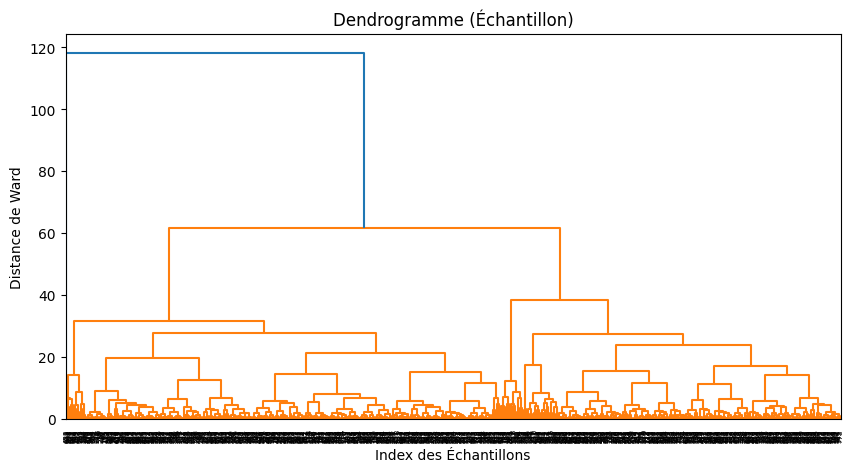

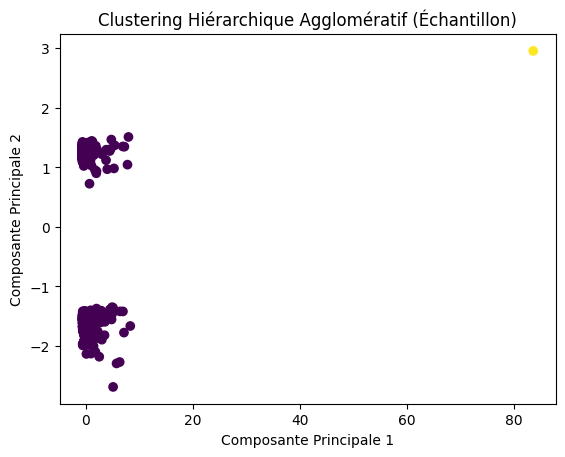

In [179]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

# Utilisation d'un échantillon des données pour le dendrogramme et le CAH
np.random.seed(42)  # Pour la reproductibilité
sample_indices = np.random.choice(X_scaled.shape[0], size=1000, replace=False)  # Taille de l'échantillon à 1000
X_sampled = X_scaled[sample_indices]

# Application de Clustering Hiérarchique Agglomératif sur l'échantillon
cah = AgglomerativeClustering(n_clusters=2)
cah_labels_sampled = cah.fit_predict(X_sampled)

# Construction de la matrice de linkage pour l'échantillon et affichage du dendrogramme
Z_sampled = linkage(X_sampled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z_sampled)
plt.title('Dendrogramme (Échantillon)')
plt.xlabel('Index des Échantillons')
plt.ylabel('Distance de Ward')
plt.show()

# Réduction de dimensionnalité avec PCA sur l'échantillon
pca = PCA(n_components=2)
X_pca_sampled = pca.fit_transform(X_sampled)

# Visualisation des résultats de CAH sur l'échantillon
plt.scatter(X_pca_sampled[:, 0], X_pca_sampled[:, 1], c=cah_labels_sampled, cmap='viridis')
plt.title('Clustering Hiérarchique Agglomératif (Échantillon)')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.show()


In [180]:
#Pour évaluer le clustering par rapport à l'événement "Target" (vente ou non), il faudrait comparer les
#clusters avec les étiquettes de vente réelles. Si un cluster contient proportionnellement plus de ventes
#que d'autres, cela pourrait indiquer un segment de marché ou un groupe de produits qui se vend bien.
#Inversement, un cluster avec peu ou pas de ventes pourrait indiquer des produits moins populaires ou
#nécessitant des actions marketing spécifiques.

In [185]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_sampled, cah_labels_sampled)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.956814795290735


In [193]:
#Un score de silhouette de 0.9568 est exceptionnellement élevé, indiquant que les clusters sont très bien définis et séparés les uns des autres. Voici ce que cela signifie en général :

#1. **Cohésion élevée** : Les points à l'intérieur de chaque cluster sont très proches les uns des autres,
#ce qui suggère une forte cohésion interne des clusters.

#2. **Séparation élevée** : Les différents clusters sont bien séparés les uns des autres,
#ce qui indique que les points appartenant à différents clusters sont nettement distincts.

### Interprétation
# Cela pourrait indiquer que les critères de regroupement utilisés (distance euclidienne, lien de Ward, etc.) sont
#très adaptés aux propriétés de nos données.

#Utilisation Pratique : Ce niveau de performance est excellent pour la plupart des applications pratiques,
# où des groupes bien définis sont cruciaux, comme la segmentation de clientèle



In [186]:
#Nous allons utiliser GridSearchCV et trouver les meilleurs hyperparamètres pour les modèles précédents,
#Nous devons définir une grille d'hyperparamètres pour chaque modèle et appliquer une recherche exhaustive.
#Voici pour chacun des modèles :

In [187]:
#Random Forest

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [10, 50],  # Réduction du nombre d'arbres
    'max_depth': [None, 10],   # Moins de profondeurs à tester
    'min_samples_split': [2, 5],  # Moins de seuils à tester
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=2, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_scaled, y)
print(grid_search_rf.best_params_)


Fitting 2 folds for each of 8 candidates, totalling 16 fits
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 10}


In [188]:
#Meilleurs hyperparametres

#max_depth: None - Cela indique que les arbres dans la forêt seront autorisés à croître autant que possible,
#sans restriction sur la profondeur.

#min_samples_split: 5 - Ce paramètre spécifie que chaque nœud doit avoir au moins 5 échantillons avant
#d'être divisé.

#n_estimators: 10 - Cela signifie que le modèle Random Forest utilisera 10 arbres.
#

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier


# Séparation des données en jeux d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle Random Forest avec les meilleurs hyperparamètres
best_rf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=5, random_state=42)
best_rf.fit(X_train, y_train)

# Prédiction sur le jeu de test
y_pred = best_rf.predict(X_test)

# Calcul de la précision
accuracy = accuracy_score(y_test, y_pred)

# Génération de la matrice de confusion et du rapport de classification
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Affichage des résultats
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.9811690859160455
Confusion Matrix:
 [[14863    36]
 [  252   143]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     14899
           1       0.80      0.36      0.50       395

    accuracy                           0.98     15294
   macro avg       0.89      0.68      0.74     15294
weighted avg       0.98      0.98      0.98     15294



In [189]:
#Régression Logistique

from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'C': [0.1, 1],  # Moins de points de régularisation
    'penalty': ['l2']  # Un seul type de pénalité si 'l1' n'est pas essentiel
}

logreg = LogisticRegression(max_iter=100, random_state=42, solver='lbfgs')
grid_search_lr = GridSearchCV(estimator=logreg, param_grid=param_grid_lr, cv=2, n_jobs=-1, verbose=1)
grid_search_lr.fit(X_scaled, y)
print(grid_search_lr.best_params_)


Fitting 2 folds for each of 2 candidates, totalling 4 fits
{'C': 1, 'penalty': 'l2'}


In [190]:
#C: 1 - Cela signifie que le paramètre de régularisation inverse, qui contrôle la force de la régularisation,
#est le meilleur à 1. La régularisation est utilisée pour éviter le surajustement en ajoutant une
#pénalité pour augmenter les coefficients du modèle.
#Un C de 1 fournit un équilibre entre régularisation et flexibilité dans le modèle.
#Un C plus élevé donnerait un modèle moins régularisé (plus flexible),
#un C plus faible donnerait un modèle plus régularisé (moins flexible).

#penalty: 'l2' - Cela indique que la meilleure pénalité pour la régularisation du modèle est la norme L2,
#également connue sous le nom de régularisation de Tikhonov ou Ridge. La pénalité L2 tend à répartir
#l'erreur parmi toutes les variables, ce qui peut être particulièrement utile lorsque plusieurs
#caractéristiques sont corrélées.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Préparation des données

# Séparation des données en jeux d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Création du modèle de régression logistique avec les meilleurs hyperparamètres trouvés
best_logreg = LogisticRegression(C=1, penalty='l2', random_state=42)

# Entraînement du modèle sur le jeu d'entraînement
best_logreg.fit(X_train, y_train)

# Prédiction sur le jeu de test
y_pred_logreg = best_logreg.predict(X_test)

# Évaluation du modèle
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
class_report_logreg = classification_report(y_test, y_pred_logreg)

# Affichage des résultats
print("Accuracy:", accuracy_logreg)
print("Confusion Matrix:\n", conf_matrix_logreg)
print("Classification Report:\n", class_report_logreg)


Accuracy: 0.974499803844645
Confusion Matrix:
 [[14863    36]
 [  354    41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     14899
           1       0.53      0.10      0.17       395

    accuracy                           0.97     15294
   macro avg       0.75      0.55      0.58     15294
weighted avg       0.97      0.97      0.97     15294



In [191]:
#Support Vector Machine (SVM)

from sklearn.svm import SVC

# Définition de la grille d'hyperparamètres
param_grid_svm = {
    'C': [1],  # Test d'une seule valeur de C
    'gamma': ['scale'],  # Utilisation de 'scale' au lieu de valeurs multiples
    # 'kernel': ['rbf']  # Un seul type de noyau si cela suffit pour vos besoins
}

svm = SVC(random_state=42)
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=2, n_jobs=-1, verbose=1)
grid_search_svm.fit(X_scaled, y)
print(grid_search_svm.best_params_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
{'C': 1, 'gamma': 'scale'}


In [192]:
#C: 1 - Ce paramètre contrôle la marge d'erreur tolérée dans la classification SVM. Plus le C est élevé,
#moins la marge d'erreur est tolérée (ce qui peut conduire à un surajustement).
#Un C de 1 indique un équilibre entre l'erreur tolérée et la marge de décision.

#gamma: 'scale' - Le paramètre gamma définit l'influence d'un seul exemple d'entraînement.
#Avec la valeur 'scale',gamma est égal à 1 / (nombre de caractéristiques X variance des données d'entraînement),
#ce qui est considéré comme une bonne estimation par défaut.

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

X = df_classification.drop('target', axis=1).values
y = df_classification['target'].values

# Normalisation des caractéristiques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation des données en jeu d'entraînement et jeu de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Création du modèle SVM avec les meilleurs hyperparamètres trouvés
best_svm = SVC(C=1, gamma='scale', random_state=42)

# Entraînement du modèle sur l'ensemble d'entraînement
best_svm.fit(X_train, y_train)

# Prédiction sur le jeu de test
y_pred = best_svm.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Affichage des résultats
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.9746305740813391
Confusion Matrix:
[[14890     9]
 [  379    16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14899
           1       0.64      0.04      0.08       395

    accuracy                           0.97     15294
   macro avg       0.81      0.52      0.53     15294
weighted avg       0.97      0.97      0.96     15294

